<center><font color='green'> Project Name: Targeted Member - Cluster Analysis</font></center>
<br><font color='green'> Note:</font></br>
<br><font color='green'>
1. Pull Socio-economic data
2. Append Socio-economic variables to the predicted veteran dataset   
3. Pull Social Isolation data and append it to the predicted veteran dataset
4. Perform K-means clustering Analysis
</font></br>
<font color='green'><p>*By David Geng*</p></font>
<font color='green'><p>*Manager: Ting Withers*</p></font>
<font color='green'><p>*Created on: 09/14/2020*</p></font>
<font color='green'><p>*Last Modified: 09/18/2020*</p></font>

In [1]:
# import all packages
import pandas as pd
import numpy as np
from scipy import stats
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# set display options
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)
pd.set_option('display.width',100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
kwargs = dict(skipinitialspace=False,engine='c',encoding='ISO-8859-1')

<font color='green'>**-----------------------------------------------Part 1:  Pull Socio-economic data. -----------------------------------**</font>

In [3]:
# import socio-economic data
cols = ['published_year','zcta', 'state','tot_disability', 'tot_population', 'tot_popul_abv16', 'earning_25to50k',
'earning_50to100k', 'earning_above100k', 'edu_attain_tot_popul', 'bachlr_deg_abv18',
'gradprof_deg_abv18', 'hh_foodstamps','hh_foodstamps_to_tot_hh', 'with_hlth_ins_cov',
'tot_hic_popul', 'tot_hh', 'hh_marriedcouple', 'hh_livingalone', 'tot_50to100k', 'tot_100to200k',
'tot_above200k', 'tot_household_income_popul', 'tot_widowed', 'tot_divorced', 'tot_marital_statu_popul',
'white_popul', 'tot_population_by_race_popul', 'africanamerican_popul', 'tot_mode_of_trans_popul', 'wrktrnsprt_pubtrnsprt']
socio_economic_df=pd.read_csv('//mbip/medicarepBI/Projects/COE/Retention/Deliverables/DSNP_Clustering/ACS1_DATA.csv', 
                **kwargs, usecols = cols, dtype={'zcta':'str'})
print(socio_economic_df.shape)
socio_economic_df.head()

(1215011, 31)


C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,state,zcta,tot_disability,tot_population,tot_popul_abv16,earning_25to50k,earning_50to100k,earning_above100k,edu_attain_tot_popul,bachlr_deg_abv18,gradprof_deg_abv18,hh_foodstamps,hh_foodstamps_to_tot_hh,with_hlth_ins_cov,tot_hic_popul,tot_hh,hh_marriedcouple,hh_livingalone,tot_50to100k,tot_100to200k,tot_above200k,tot_household_income_popul,tot_widowed,tot_divorced,tot_marital_statu_popul,white_popul,tot_population_by_race_popul,africanamerican_popul,tot_mode_of_trans_popul,wrktrnsprt_pubtrnsprt,published_year
0,NaN,00610,6841,27898,9089,1249,332,21,22034,2512,626,3973,43.140,27106.000,27898.000,9210.000,2412.000,2205.000,793.000,102.000,16.000,9210.000,1726.000,3111.000,23244.000,16259.000,27976.000,1018.000,210095.000,0.000,2016
1,NaN,00612,10691,64572,18437,3866,1233,286,50367,8467,2791,10342,45.020,60850.000,64572.000,22971.000,7471.000,5647.000,2944.000,356.000,73.000,0.000,4228.000,8159.000,53181.000,53756.000,64816.000,3252.000,527177.000,0.000,2015
2,NaN,00622,1301,7336,1450,363,88,87,5887,845,284,1004,40.110,7077.000,7336.000,2503.000,403.000,805.000,234.000,53.000,56.000,2503.000,471.000,848.000,6188.000,4530.000,7385.000,95.000,45498.000,0.000,2016
3,NaN,00631,324,1689,405,70,15,0,1398,217,11,452,69.750,1579.000,1689.000,648.000,143.000,235.000,46.000,0.000,0.000,648.000,173.000,189.000,1451.000,1235.000,1689.000,0.000,13116.000,0.000,2016
4,NaN,00647,2016,5711,1386,180,28,0,4722,559,148,899,49.450,5468.000,5711.000,1818.000,458.000,452.000,122.000,4.000,0.000,1818.000,525.000,409.000,4890.000,4614.000,5711.000,98.000,36715.000,0.000,2016


In [4]:
# select 2016 data since 2016 data has latest zipcode information
socio_economic_df_2016=socio_economic_df[socio_economic_df['published_year']==2016]
print('Shape of 2016: ' + str(socio_economic_df_2016.shape))
print('Missing 2016 Zips: ' + str(socio_economic_df_2016.zcta.isnull().sum()))

Shape of 2016: (327454, 31)
Missing 2016 Zips: 294334


In [5]:
# check duplicates -- lots of duplicates, we need to aggragate to the zip code level
print('Unique counts of the zip codes: ',socio_economic_df_2016.zcta.nunique())
print('Shape of the socio-economic dataset at zip code level: ', socio_economic_df_2016.shape)

Unique counts of the zip codes:  33120
Shape of the socio-economic dataset at zip code level:  (327454, 31)


In [6]:
# aggragate to the zip code level
socio_economic_grouped = socio_economic_df_2016.groupby(['zcta']).agg('sum').reset_index()
print('Unique counts of the zip codes: ',socio_economic_grouped.zcta.nunique())
print('Shape of the socio-economic dataset at zip code level: ', socio_economic_grouped.shape)
socio_economic_grouped.head()

Unique counts of the zip codes:  33120
Shape of the socio-economic dataset at zip code level:  (33120, 30)


,zcta,tot_disability,tot_population,tot_popul_abv16,earning_25to50k,earning_50to100k,earning_above100k,edu_attain_tot_popul,bachlr_deg_abv18,gradprof_deg_abv18,hh_foodstamps,hh_foodstamps_to_tot_hh,with_hlth_ins_cov,tot_hic_popul,tot_hh,hh_marriedcouple,hh_livingalone,tot_50to100k,tot_100to200k,tot_above200k,tot_household_income_popul,tot_widowed,tot_divorced,tot_marital_statu_popul,white_popul,tot_population_by_race_popul,africanamerican_popul,tot_mode_of_trans_popul,wrktrnsprt_pubtrnsprt,published_year
0,00601,3616,17754,4435,1009,149,58,13670,1985,376,3154,52.930,16503.000,17754.000,5959.000,1861.000,1322.000,415.000,103.000,14.000,5959.000,855.000,2100.000,14472.000,14436.000,17800.000,108.000,121080.000,0.000,2016
1,00602,10792,39674,12454,1912,431,51,31483,4331,1764,5910,46.230,37497.000,39674.000,12785.000,3277.000,3036.000,1267.000,214.000,0.000,12785.000,2089.000,4218.000,33160.000,22941.000,39716.000,968.000,345354.000,0.000,2016
2,00603,11700,49940,14697,2899,1051,282,40573,6292,2262,8348,44.340,47081.000,49940.000,18828.000,5599.000,5040.000,2108.000,450.000,104.000,18828.000,2955.000,6139.000,42696.000,35176.000,51565.000,2149.000,333713.000,0.000,2016
3,00606,576,6320,1642,97,0,0,5038,409,77,1084,54.890,6167.000,6320.000,1975.000,545.000,456.000,46.000,0.000,0.000,1975.000,377.000,564.000,5304.000,3739.000,6320.000,175.000,32363.000,0.000,2016
4,00610,6841,27898,9089,1249,332,21,22034,2512,626,3973,43.140,27106.000,27898.000,9210.000,2412.000,2205.000,793.000,102.000,16.000,9210.000,1726.000,3111.000,23244.000,16259.000,27976.000,1018.000,210095.000,0.000,2016


In [7]:
# Create group variables at zip code level
#DISABILITY
socio_economic_grouped['Disability_Ratio'] = \
socio_economic_grouped.tot_disability/socio_economic_grouped.tot_population

#INCOME
socio_economic_grouped['25Kto50K_earnings_Ratio'] = \
socio_economic_grouped.earning_25to50k/socio_economic_grouped.tot_popul_abv16
socio_economic_grouped['Above_50K_earnings_Ratio'] = \
(socio_economic_grouped.earning_50to100k+socio_economic_grouped.earning_above100k)/socio_economic_grouped.tot_popul_abv16

#EDUCATION
socio_economic_grouped['Higher_Education_Ratio'] = \
(socio_economic_grouped.bachlr_deg_abv18+socio_economic_grouped.gradprof_deg_abv18)/socio_economic_grouped.edu_attain_tot_popul

#FOODSTAMPS
socio_economic_grouped['HH_Foodstamps_Ratio'] = \
socio_economic_grouped.hh_foodstamps/(socio_economic_grouped.hh_foodstamps/\
                                      socio_economic_grouped.hh_foodstamps_to_tot_hh)/100

#LIVING ALONE
socio_economic_grouped['HH_Married_Couple_Ratio'] = socio_economic_grouped.hh_marriedcouple/socio_economic_grouped.tot_hh
socio_economic_grouped['HH_Living_Alone_Ratio'] = socio_economic_grouped.hh_livingalone/socio_economic_grouped.tot_hh

#WIDOWED/DIVORCED
socio_economic_grouped['Total_Widowed_Divorced_Ratio'] = \
(socio_economic_grouped.tot_widowed+socio_economic_grouped.tot_divorced)/socio_economic_grouped.tot_marital_statu_popul

#RACE
socio_economic_grouped['White_Pop_Ratio'] = \
socio_economic_grouped.white_popul/socio_economic_grouped.tot_population_by_race_popul
socio_economic_grouped['African_American_Pop_Ratio'] = \
socio_economic_grouped.africanamerican_popul/socio_economic_grouped.tot_population_by_race_popul

#TRANSPORTATION
socio_economic_grouped['Work_Transport_Public_Ratio'] = \
socio_economic_grouped.wrktrnsprt_pubtrnsprt/socio_economic_grouped.tot_mode_of_trans_popul

socio_economic_grouped.rename(columns={'zcta':'Zip_code'},inplace=True)
socio_economic_grouped.head()

,Zip_code,tot_disability,tot_population,tot_popul_abv16,earning_25to50k,earning_50to100k,earning_above100k,edu_attain_tot_popul,bachlr_deg_abv18,gradprof_deg_abv18,hh_foodstamps,hh_foodstamps_to_tot_hh,with_hlth_ins_cov,tot_hic_popul,tot_hh,hh_marriedcouple,hh_livingalone,tot_50to100k,tot_100to200k,tot_above200k,tot_household_income_popul,tot_widowed,tot_divorced,tot_marital_statu_popul,white_popul,tot_population_by_race_popul,africanamerican_popul,tot_mode_of_trans_popul,wrktrnsprt_pubtrnsprt,published_year,Disability_Ratio,25Kto50K_earnings_Ratio,Above_50K_earnings_Ratio,Higher_Education_Ratio,HH_Foodstamps_Ratio,HH_Married_Couple_Ratio,HH_Living_Alone_Ratio,Total_Widowed_Divorced_Ratio,White_Pop_Ratio,African_American_Pop_Ratio,Work_Transport_Public_Ratio
0,00601,3616,17754,4435,1009,149,58,13670,1985,376,3154,52.930,16503.000,17754.000,5959.000,1861.000,1322.000,415.000,103.000,14.000,5959.000,855.000,2100.000,14472.000,14436.000,17800.000,108.000,121080.000,0.000,2016,0.204,0.228,0.047,0.173,0.529,0.312,0.222,0.204,0.811,0.006,0.000
1,00602,10792,39674,12454,1912,431,51,31483,4331,1764,5910,46.230,37497.000,39674.000,12785.000,3277.000,3036.000,1267.000,214.000,0.000,12785.000,2089.000,4218.000,33160.000,22941.000,39716.000,968.000,345354.000,0.000,2016,0.272,0.154,0.039,0.194,0.462,0.256,0.237,0.190,0.578,0.024,0.000
2,00603,11700,49940,14697,2899,1051,282,40573,6292,2262,8348,44.340,47081.000,49940.000,18828.000,5599.000,5040.000,2108.000,450.000,104.000,18828.000,2955.000,6139.000,42696.000,35176.000,51565.000,2149.000,333713.000,0.000,2016,0.234,0.197,0.091,0.211,0.443,0.297,0.268,0.213,0.682,0.042,0.000
3,00606,576,6320,1642,97,0,0,5038,409,77,1084,54.890,6167.000,6320.000,1975.000,545.000,456.000,46.000,0.000,0.000,1975.000,377.000,564.000,5304.000,3739.000,6320.000,175.000,32363.000,0.000,2016,0.091,0.059,0.000,0.096,0.549,0.276,0.231,0.177,0.592,0.028,0.000
4,00610,6841,27898,9089,1249,332,21,22034,2512,626,3973,43.140,27106.000,27898.000,9210.000,2412.000,2205.000,793.000,102.000,16.000,9210.000,1726.000,3111.000,23244.000,16259.000,27976.000,1018.000,210095.000,0.000,2016,0.245,0.137,0.039,0.142,0.431,0.262,0.239,0.208,0.581,0.036,0.000


In [8]:
# Only keep the variables that relates to the veteran Analysis in the dataset
cols_to_keep = ['Zip_code','Disability_Ratio','25Kto50K_earnings_Ratio','Above_50K_earnings_Ratio','Higher_Education_Ratio',
                'HH_Foodstamps_Ratio','HH_Married_Couple_Ratio','HH_Living_Alone_Ratio',
                'Total_Widowed_Divorced_Ratio','White_Pop_Ratio','African_American_Pop_Ratio','Work_Transport_Public_Ratio']
socio_economic_grouped=socio_economic_grouped[cols_to_keep]
socio_economic_grouped.head()

,Zip_code,Disability_Ratio,25Kto50K_earnings_Ratio,Above_50K_earnings_Ratio,Higher_Education_Ratio,HH_Foodstamps_Ratio,HH_Married_Couple_Ratio,HH_Living_Alone_Ratio,Total_Widowed_Divorced_Ratio,White_Pop_Ratio,African_American_Pop_Ratio,Work_Transport_Public_Ratio
0,00601,0.204,0.228,0.047,0.173,0.529,0.312,0.222,0.204,0.811,0.006,0.000
1,00602,0.272,0.154,0.039,0.194,0.462,0.256,0.237,0.190,0.578,0.024,0.000
2,00603,0.234,0.197,0.091,0.211,0.443,0.297,0.268,0.213,0.682,0.042,0.000
3,00606,0.091,0.059,0.000,0.096,0.549,0.276,0.231,0.177,0.592,0.028,0.000
4,00610,0.245,0.137,0.039,0.142,0.431,0.262,0.239,0.208,0.581,0.036,0.000


<font color='green'>**-----------------------------------------------Part 2:  Append Socio-economic variables to the predicted veteran dataset. -----------------------------------**</font>

In [9]:
# read in the predicted veteran data from the pickle
Active_members_top_22_veterans_65_plus=pd.read_pickle('Active_members_top_22_veterans_65_plus.pkl')
print(Active_members_top_22_veterans_65_plus.shape)
Active_members_top_22_veterans_65_plus.head()

(290639, 121)


,MEDICARE_NUMBER,Member_ID,Eff_Date,Term_Date,Mbr_Mths,Contract_Number,PBP,Product,CMS_County,CMS_State,NEW_REGION,MA_Territory,DOB,Age,Gender,Zip,FIPS,Plan_Type,dual_Status,PCP_Name_x,PCP_Tax_ID,GroupName,GroupNumber,GroupSegment,GroupSegmentName,TRR_Parent_Name,TOH_Name,Recruiter_Name,Writing_Agent_Name,Sales_Channel,New_Market,SNP,LIS_Flag,Enroll_Status,Issued_Status,Group_Status,EMERG_TRANSACTIONS,PCP_TRANSACTIONS,SPCLST_TRANSACTIONS,IP_TRANSACTIONS,EMERG_VISITS,PRIMARY_CARE_VISITS,SPCLST_VISITS,IP_VISITS,PREVENTIVE_CARE_VISITS,EMERG_BENEFIT_PAID_AMT,PCP_BENEFIT_PAID_AMT,SPCLST_BENEFIT_PAID_AMT,IP_BENEFIT_PAID_AMT,EMERG_MBR_PAID_AMT,...,IND_PCP,PCP_Name_y,Counts_Eligible,Adult BMI - Noncompliant,Breast Cancer Screening - Noncompliant,Colorectal Cancer - Noncompliant,Diabetes - Blood Sugar Controlled - Noncompliant,Diabetes - Eye - Noncompliant,Diabetes - Kidney - Noncompliant,Osteo Screening - Noncompliant,Rheumatoid Arthritis - Noncompliant,Statin Therapy for Patients with CD - Noncompliant,Medication Reconciliation Post Discharge - Noncompliant,Medication Therapy Management - Noncompliant,ACEI/ARB Adherence - Noncompliant,Diabetes Adherence - Noncompliant,Statin Adherence - Noncompliant,Statin use in Diabetes - Noncompliant,Ind_PTSD_Related_Disorders,Ind_Addictive_diagnosis,High_Need_Group,Ind_Mental_Disorder,HOSPICE_IND,DISABILITY_IND,ESRD_IND,OUT_OF_AREA_FLAG,Distance_From_VA,RX_MBR_PAID_AMOUNT,RX_CLAIM_COUNT,DISTINCT_GPI,GRV_COUNTS,Call_counts,Decile,Propensity,Adult BMI - Compliant,Breast Cancer Screening - Compliant,Colorectal Cancer - Compliant,Diabetes - Blood Sugar Controlled - Compliant,Diabetes - Eye - Compliant,Diabetes - Kidney - Compliant,Osteo Screening - Compliant,Rheumatoid Arthritis - Compliant,Statin Therapy for Patients with CD - Compliant,Medication Reconciliation Post Discharge,Medication Therapy Management,ACEI/ARB Adherence - Compliant,Diabetes Adherence - Compliant,Statin Adherence - Compliant,Statin use in Diabetes - Compliant,Counts_noncompliant
0,8WK7HC9FG42,MEBSCQPM,2019-02-01,9999-12-31,19,H3931,130,MA,MARICOPA,AZ,NORTHCENTRAL,AZ_PHOENIX,1948-06-01,72.000,F,91356,04013,HMO,None,4C Medical Group PLC ...,452402948,WC INDIVIDUAL HMO,354163,40,None,None,Senior Market Sales Inc.,"Health Plan One, LLC","Roman, Edgar",Strategic,ARIZONA,None,None,Active,Issued,Individual,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,No,NaN,3.000,1.000,-1.000,1.000,-1.000,-1.000,-1.000,-1.000,-1.000,1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,242.300,0.000,0.000,0.000,0.000,2.000,1,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,nan,0.000,nan,3.000
1,8M08K91MW65,MEBQT47B,2019-01-01,9999-12-31,20,H5521,159,MA,ESSEX,MA,NORTHEAST,MA_EASTERN,1948-06-30,72.000,M,33884,25009,PPO,None,"Cecchetti, Carlo ...",042929385,NE IND PPO,467454,40,None,None,"Aon Hewitt Health Market Insurance Solutions, ...","Aon Hewitt Health Market Insurance Solutions, ...","Fee, Sandra",EmpGroupExchange,NEWENGLAND,None,None,Active,Issued,Individual,5.000,1.000,4.000,0.000,1.000,1.000,2.000,0.000,0.000,739.630,9.310,543.990,0.000,90.000,...,No,NaN,6.000,0.000,-1.000,1.000,1.000,1.000,1.000,-1.000,-1.000,0.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1098.500,11.620,7.000,4.000,0.000,14.000,1,1.000,nan,nan,nan,0.000,0.000,1.000,nan,nan,nan,0.000,nan,nan,nan,1.000,nan,4.000
2,6DY3W92CA88,MEBQX5QV,2019-01-01,9999-12-31,20,H5521,099,MA,ALLEN,IN,NORTHCENTRAL,IN_NORTHEAST,1948-08-28,72.000,M,32754,18003,PPO,None,Parkview Care Partners LLC ...,570562430,NC IND PPO,467248,40,None,None,Senior Market Sales Inc.,"Unisource, LLC","Bryk, Vicki",NDP,GREATLAKES,None,None,Active,Issued,Individual,6.000,4.000,16.000,8.000,2.000,5.000,9.000,3.000,0.000,465.190,538.400,911.380,614.050,0.000,...,Yes,NaN,6.000,0.000,-1.000,1.000,0.000,1.000,1.000,-1.000,-1.000,-1.000,0.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,1.000,1.

<font color='green'>**---------------------------------------Part 3:  Perform K-means clustering Analysis for the Veteran Model. -----------------------------**</font>

## Veteran model K-means

In [10]:
# set the MEDICARE_NUMBER as index, and exclude object variables 
keep_list=['Distance_From_VA',
'Mbr_Mths',
'Breast Cancer Screening - Noncompliant',
'DISTINCT_GPI',
'Age',
'Colorectal Cancer - Noncompliant',
'DISABILITY_IND',
'High_Need_Group',
'Statin Adherence - Noncompliant',
'PRIMARY_CARE_VISITS',
'IND_PCP',
'EMERG_VISITS',
'ACEI/ARB Adherence - Noncompliant',
'Diabetes - Kidney - Noncompliant',
'Diabetes - Eye - Noncompliant',
'Medication Therapy Management - Noncompliant',
'Ind_Mental_Disorder',
'IP_VISITS',
'SPCLST_VISITS',
'PREVENTIVE_CARE_VISITS',
'SPCLST_MBR_PAID_AMT',
'TOTAL_MED_COST',
'BEHAVIORAL_HEALTH_VISITS',
'Call_counts',
'Counts_noncompliant',
'OUT_OF_AREA_FLAG',
'PCP_MBR_PAID_AMT',
'Diabetes - Blood Sugar Controlled - Noncompliant',
'Ind_PTSD_Related_Disorders',
'Counts_Eligible',
'IP_MBR_PAID_AMT',
'GRV_COUNTS',
'Statin Therapy for Patients with CD - Noncompliant',
'Adult BMI - Noncompliant',
'Diabetes Adherence - Noncompliant',
'Ind_Addictive_diagnosis']
Active_members_top_22_veterans_65_plus=\
    Active_members_top_22_veterans_65_plus[Active_members_top_22_veterans_65_plus.CMS_State == 'NY']
top_22_veterans_65_plus=Active_members_top_22_veterans_65_plus.set_index(['MEDICARE_NUMBER'])
cluster_df=top_22_veterans_65_plus[keep_list]
cluster_df.head()

,Distance_From_VA,Mbr_Mths,Breast Cancer Screening - Noncompliant,DISTINCT_GPI,Age,Colorectal Cancer - Noncompliant,DISABILITY_IND,High_Need_Group,Statin Adherence - Noncompliant,PRIMARY_CARE_VISITS,IND_PCP,EMERG_VISITS,ACEI/ARB Adherence - Noncompliant,Diabetes - Kidney - Noncompliant,Diabetes - Eye - Noncompliant,Medication Therapy Management - Noncompliant,Ind_Mental_Disorder,IP_VISITS,SPCLST_VISITS,PREVENTIVE_CARE_VISITS,SPCLST_MBR_PAID_AMT,TOTAL_MED_COST,BEHAVIORAL_HEALTH_VISITS,Call_counts,Counts_noncompliant,OUT_OF_AREA_FLAG,PCP_MBR_PAID_AMT,Diabetes - Blood Sugar Controlled - Noncompliant,Ind_PTSD_Related_Disorders,Counts_Eligible,IP_MBR_PAID_AMT,GRV_COUNTS,Statin Therapy for Patients with CD - Noncompliant,Adult BMI - Noncompliant,Diabetes Adherence - Noncompliant,Ind_Addictive_diagnosis
MEDICARE_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8DJ5C03VQ40,216.700,17,-1.000,0.000,71.000,-1.000,0.000,1.000,-1.000,4.000,No,3.000,-1.000,0.000,1.000,-1.000,1.000,0.000,5.000,0.000,0.000,4476.100,0.000,0.000,2.000,1.000,0.000,1.000,0.000,3.000,0.000,0.000,-1.000,-1.000,-1.000,1.000
5A07CM1KY40,1078.300,20,-1.000,0.000,70.000,1.000,0.000,0.000,-1.000,0.000,No,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2.000,0.000,0.000,-1.000,0.000,2.000,0.000,0.000,-1.000,1.000,-1.000,0.000
2Q35XT3AV50,946.500,20,-1.000,0.000,69.000,1.000,0.000,0.000,-1.000,0.000,No,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,2.000,0.000,0.000,-1.000,0.000,2.000,0.000,0.000,-1.000,1.000,-1.000,0.000
8YE9T71TG56,700.800,19,-1.000,0.000,67.000,1.000,0.000,0.000,-1.000,0.000,No,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.000,2.000,0.000,0.000,-1.000,0.000,2.000,0.000,0.000,-1.000,1.000,-1.000,0.000
1WW6AW2NR79,188.500,20,-1.000,0.000,67.000,1.000,0.000,0.000,-1.000,0.000,No,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,-1.000,0.000,2.000,0.000,0.000,-1.000,0.000,-1.000,0.000


In [11]:
# drop compliance variables and keep the noncompliance variables
cluster_df.IND_PCP=cluster_df.IND_PCP.map({'Yes':1,'No':0})
cluster_df.head()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Distance_From_VA,Mbr_Mths,Breast Cancer Screening - Noncompliant,DISTINCT_GPI,Age,Colorectal Cancer - Noncompliant,DISABILITY_IND,High_Need_Group,Statin Adherence - Noncompliant,PRIMARY_CARE_VISITS,IND_PCP,EMERG_VISITS,ACEI/ARB Adherence - Noncompliant,Diabetes - Kidney - Noncompliant,Diabetes - Eye - Noncompliant,Medication Therapy Management - Noncompliant,Ind_Mental_Disorder,IP_VISITS,SPCLST_VISITS,PREVENTIVE_CARE_VISITS,SPCLST_MBR_PAID_AMT,TOTAL_MED_COST,BEHAVIORAL_HEALTH_VISITS,Call_counts,Counts_noncompliant,OUT_OF_AREA_FLAG,PCP_MBR_PAID_AMT,Diabetes - Blood Sugar Controlled - Noncompliant,Ind_PTSD_Related_Disorders,Counts_Eligible,IP_MBR_PAID_AMT,GRV_COUNTS,Statin Therapy for Patients with CD - Noncompliant,Adult BMI - Noncompliant,Diabetes Adherence - Noncompliant,Ind_Addictive_diagnosis
MEDICARE_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8DJ5C03VQ40,216.700,17,-1.000,0.000,71.000,-1.000,0.000,1.000,-1.000,4.000,0,3.000,-1.000,0.000,1.000,-1.000,1.000,0.000,5.000,0.000,0.000,4476.100,0.000,0.000,2.000,1.000,0.000,1.000,0.000,3.000,0.000,0.000,-1.000,-1.000,-1.000,1.000
5A07CM1KY40,1078.300,20,-1.000,0.000,70.000,1.000,0.000,0.000,-1.000,0.000,0,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2.000,0.000,0.000,-1.000,0.000,2.000,0.000,0.000,-1.000,1.000,-1.000,0.000
2Q35XT3AV50,946.500,20,-1.000,0.000,69.000,1.000,0.000,0.000,-1.000,0.000,0,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,2.000,0.000,0.000,-1.000,0.000,2.000,0.000,0.000,-1.000,1.000,-1.000,0.000
8YE9T71TG56,700.800,19,-1.000,0.000,67.000,1.000,0.000,0.000,-1.000,0.000,0,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.000,2.000,0.000,0.000,-1.000,0.000,2.000,0.000,0.000,-1.000,1.000,-1.000,0.000
1WW6AW2NR79,188.500,20,-1.000,0.000,67.000,1.000,0.000,0.000,-1.000,0.000,0,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,-1.000,0.000,2.000,0.000,0.000,-1.000,0.000,-1.000,0.000


In [12]:
# fit the model with K from range 1 to 10, then output the inertia
from sklearn.cluster import KMeans
from sklearn import preprocessing
normalized_cluster_df = preprocessing.normalize(cluster_df)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(normalized_cluster_df)
    distortions.append(kmeanModel.inertia_)

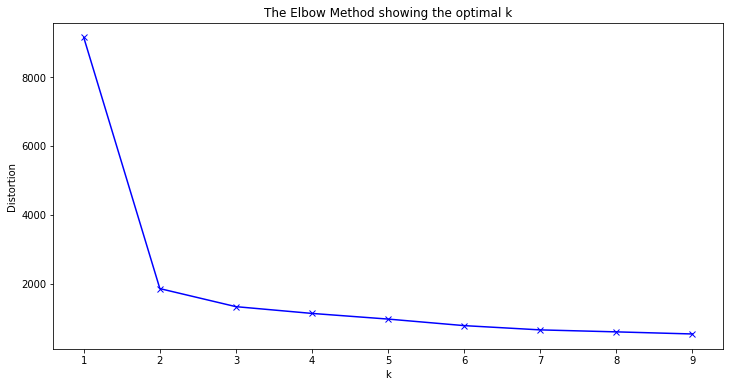

In [13]:
# plot the distortions vs K-value.
# from the graph, we see the elbow point is at k=3
plt.figure(figsize=(12,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

In [14]:
# fit a k means models with k=3 and output the centriods for the 3 clusters
kmeanModel = KMeans(n_clusters=3).fit(normalized_cluster_df)
centroids = kmeanModel.cluster_centers_
print(centroids)

[[  9.82882776e-03   2.66094282e-02  -1.22087983e-03   4.75817403e-03
    8.96630514e-02  -2.53544384e-04   2.33616748e-05   2.78794089e-04
   -7.69167461e-04   1.84139611e-03   4.29941515e-04   5.75372780e-05
   -7.81967429e-04  -1.02140043e-03  -9.58835095e-04  -1.19063070e-03
    2.04996690e-04   5.53094539e-05   3.92870442e-03   1.41442299e-04
    1.11063456e-01   9.77664022e-01   8.82974538e-05   4.55221006e-03
    1.02342287e-03   1.75362492e-05   1.40507246e-02  -9.27889692e-04
    6.73167384e-06   2.86994849e-03   5.99332298e-03   1.08737909e-05
   -1.13943391e-03  -4.09865548e-04  -1.06221095e-03   2.28206698e-05]
 [  8.53926097e-02   3.12569269e-01  -1.19627467e-02   1.20076682e-02
    9.02089820e-01  -1.62420419e-03   2.33200587e-04   7.35328122e-04
   -1.08708423e-02   2.88672416e-04   3.05048757e-03   2.11752767e-06
   -1.07112802e-02  -1.14744957e-02  -1.13487915e-02  -1.22941511e-02
    7.15364379e-04  -4.89246230e-18   4.16818905e-04  -9.60874175e-18
    2.35807287e-03 

In [15]:
# output the K-means model labels as we see, 0,1 and 2.
import numpy as np
print(np.unique(kmeanModel.labels_,return_counts=True))

(array([0, 1, 2]), array([19402,  5966,  3745], dtype=int64))


In [16]:
# output the label of each data point
cluster_df['Veteran_cluster']=kmeanModel.labels_
Active_members_top_22_veterans_65_plus['Veteran_cluster']=kmeanModel.labels_
print(cluster_df.Veteran_cluster.value_counts())
cluster_df.head(10)

0    19402
1     5966
2     3745
Name: Veteran_cluster, dtype: int64


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Distance_From_VA,Mbr_Mths,Breast Cancer Screening - Noncompliant,DISTINCT_GPI,Age,Colorectal Cancer - Noncompliant,DISABILITY_IND,High_Need_Group,Statin Adherence - Noncompliant,PRIMARY_CARE_VISITS,IND_PCP,EMERG_VISITS,ACEI/ARB Adherence - Noncompliant,Diabetes - Kidney - Noncompliant,Diabetes - Eye - Noncompliant,Medication Therapy Management - Noncompliant,Ind_Mental_Disorder,IP_VISITS,SPCLST_VISITS,PREVENTIVE_CARE_VISITS,SPCLST_MBR_PAID_AMT,TOTAL_MED_COST,BEHAVIORAL_HEALTH_VISITS,Call_counts,Counts_noncompliant,OUT_OF_AREA_FLAG,PCP_MBR_PAID_AMT,Diabetes - Blood Sugar Controlled - Noncompliant,Ind_PTSD_Related_Disorders,Counts_Eligible,IP_MBR_PAID_AMT,GRV_COUNTS,Statin Therapy for Patients with CD - Noncompliant,Adult BMI - Noncompliant,Diabetes Adherence - Noncompliant,Ind_Addictive_diagnosis,Veteran_cluster
MEDICARE_NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8DJ5C03VQ40,216.700,17,-1.000,0.000,71.000,-1.000,0.000,1.000,-1.000,4.000,0,3.000,-1.000,0.000,1.000,-1.000,1.000,0.000,5.000,0.000,0.000,4476.100,0.000,0.000,2.000,1.000,0.000,1.000,0.000,3.000,0.000,0.000,-1.000,-1.000,-1.000,1.000,0
5A07CM1KY40,1078.300,20,-1.000,0.000,70.000,1.000,0.000,0.000,-1.000,0.000,0,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2.000,0.000,0.000,-1.000,0.000,2.000,0.000,0.000,-1.000,1.000,-1.000,0.000,1
2Q35XT3AV50,946.500,20,-1.000,0.000,69.000,1.000,0.000,0.000,-1.000,0.000,0,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,2.000,0.000,0.000,-1.000,0.000,2.000,0.000,0.000,-1.000,1.000,-1.000,0.000,1
8YE9T71TG56,700.800,19,-1.000,0.000,67.000,1.000,0.000,0.000,-1.000,0.000,0,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.000,2.000,0.000,0.000,-1.000,0.000,2.000,0.000,0.000,-1.000,1.000,-1.000,0.000,1
1WW6AW2NR79,188.500,20,-1.000,0.000,67.000,1.000,0.000,0.000,-1.000,0.000,0,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,-1.000,0.000,2.000,0.000,0.000,-1.000,0.000,-1.000,0.000,1
9Q06RR3TH55,1093.600,24,-1.000,1.000,76.000,-1.000,0.000,0.000,-1.000,0.000,0,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.000,0.000,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,0.000,1
6DW1CG2HE00,1006.100,20,-1.000,0.000,73.000,0.000,0.000,0.000,-1.000,0.000,1,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,0.000,2.000,0.000,0.000,-1.000,0.000,-1.000,0.000,1
4AQ7P52RJ47,175.800,18,-1.000,0.000,67.000,-1.000,0.000,0.000,-1.000,3.000,0,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,1.000,1.000,0.000,428.730,0.000,14.000,0.000,1.000,18.530,-1.000,0.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,1.000,0
8RT5RX0RR76,927.500,20,-1.000,0.000,75.000,1.000,0.000,0.000,-1.000,0.000,0,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,1.000,0.000,40.000,80.800,0.000,9.000,1.000,1.000,0.000,-1.000,0.000,1.000,0.000,0.000,-1.000,-1.000,-1.000,0.000,2


In [17]:
# output veteran cluster for profiling - Do Not Use the HEDIS measure here, Below is the code for the calculate visit average
cluster_df.groupby('Veteran_cluster').agg(np.mean)

,Distance_From_VA,Mbr_Mths,Breast Cancer Screening - Noncompliant,DISTINCT_GPI,Age,Colorectal Cancer - Noncompliant,DISABILITY_IND,High_Need_Group,Statin Adherence - Noncompliant,PRIMARY_CARE_VISITS,IND_PCP,EMERG_VISITS,ACEI/ARB Adherence - Noncompliant,Diabetes - Kidney - Noncompliant,Diabetes - Eye - Noncompliant,Medication Therapy Management - Noncompliant,Ind_Mental_Disorder,IP_VISITS,SPCLST_VISITS,PREVENTIVE_CARE_VISITS,SPCLST_MBR_PAID_AMT,TOTAL_MED_COST,BEHAVIORAL_HEALTH_VISITS,Call_counts,Counts_noncompliant,OUT_OF_AREA_FLAG,PCP_MBR_PAID_AMT,Diabetes - Blood Sugar Controlled - Noncompliant,Ind_PTSD_Related_Disorders,Counts_Eligible,IP_MBR_PAID_AMT,GRV_COUNTS,Statin Therapy for Patients with CD - Noncompliant,Adult BMI - Noncompliant,Diabetes Adherence - Noncompliant,Ind_Addictive_diagnosis
Veteran_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,11.021,21.960,-0.998,5.071,73.968,-0.283,0.023,0.341,-0.596,2.549,0.342,0.222,-0.624,-0.814,-0.759,-0.945,0.201,0.776,6.402,0.128,220.520,4033.296,0.204,4.853,0.814,0.017,26.452,-0.725,0.012,2.508,111.524,0.011,-0.916,-0.388,-0.849,0.025
1,14.502,30.101,-0.972,1.012,74.005,-0.175,0.017,0.069,-0.877,0.025,0.241,0.000,-0.865,-0.934,-0.924,-0.997,0.062,0.000,0.038,0.000,0.263,1.811,0.000,1.673,0.661,0.014,0.030,-0.916,0.000,1.192,0.000,0.004,-0.996,-0.552,-0.966,0.009
2,33.690,33.781,-0.997,2.524,74.459,-0.214,0.011,0.135,-0.722,0.606,0.297,0.004,-0.715,-0.894,-0.864,-0.993,0.107,0.003,1.033,0.037,22.848,148.324,0.006,2.601,0.768,0.019,3.888,-0.857,0.002,1.818,0.000,0.009,-0.963,-0.353,-0.914,0.009


In [18]:
# output veteran cluster for profiling 
cluster_df.describe()

,Distance_From_VA,Mbr_Mths,Breast Cancer Screening - Noncompliant,DISTINCT_GPI,Age,Colorectal Cancer - Noncompliant,DISABILITY_IND,High_Need_Group,Statin Adherence - Noncompliant,PRIMARY_CARE_VISITS,IND_PCP,EMERG_VISITS,ACEI/ARB Adherence - Noncompliant,Diabetes - Kidney - Noncompliant,Diabetes - Eye - Noncompliant,Medication Therapy Management - Noncompliant,Ind_Mental_Disorder,IP_VISITS,SPCLST_VISITS,PREVENTIVE_CARE_VISITS,SPCLST_MBR_PAID_AMT,TOTAL_MED_COST,BEHAVIORAL_HEALTH_VISITS,Call_counts,Counts_noncompliant,OUT_OF_AREA_FLAG,PCP_MBR_PAID_AMT,Diabetes - Blood Sugar Controlled - Noncompliant,Ind_PTSD_Related_Disorders,Counts_Eligible,IP_MBR_PAID_AMT,GRV_COUNTS,Statin Therapy for Patients with CD - Noncompliant,Adult BMI - Noncompliant,Diabetes Adherence - Noncompliant,Ind_Addictive_diagnosis,Veteran_cluster
count,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000,29113.000
mean,14.651,25.149,-0.992,3.911,74.039,-0.252,0.020,0.259,-0.670,1.782,0.316,0.148,-0.685,-0.849,-0.806,-0.962,0.160,0.518,4.407,0.090,149.956,2707.391,0.137,3.911,0.777,0.017,18.135,-0.781,0.008,2.150,74.324,0.009,-0.938,-0.417,-0.881,0.020,0.462
std,102.792,28.045,0.118,3.780,7.054,0.875,0.140,0.438,0.511,3.208,0.465,0.549,0.505,0.431,0.545,0.243,0.367,3.117,6.610,0.289,325.140,8886.936,1.364,8.000,1.088,0.128,85.597,0.603,0.089,2.251,419.594,0.125,0.292,0.787,0.344,0.139,0.711
min,0.100,2.000,-1.000,0.000,65.000,-1.000,0.000,0.000,-1.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,0.000,0.000
25%,2.400,17.000,-1.000,1.000,68.000,-1.000,0.000,0.000,-1.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,115.130,0.000,0.000,0.000,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,0.000,0.000
50%,4.600,20.000,-1.000,3.000,72.000,-1.000,0.000,0.000,-1.000,1.000,0.000,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,2.000,0.000,45.000,531.580,0.000,0.000,0.000,0.000,0.000,-1.000,0.000,2.000,0.000,0.000,-1.000,-1.000,-1.000,0.000,0.000
75%,8.900,20.000,-1.000,6.000,78.000,1.000,0.000,1.000,0.000,2.000,1.000,0.000,0.000,-1.000,-1.000,-1.000,0.000,0.000,6.000,0.000,156.210,1578.950,0.000,5.000,1.000,0.000,10.000,-1.000,0.000,3.000,0.000,0.000,-1.000,0.000,-1.000,0.000,1.000
max,4601.800,323.000,1.000,32.000,105.000,1.000,1.000,1.000,1.000,101.000,1.000,15.000,1.000,1.000,1.000,1.000,1.000,101.000,182.000,3.000,6707.360,430394.380,44.000,200.000,7.000,1.000,5955.300,1.000,1.000,12.000,12285.820,11.000,1.000,1.000,1.000,1.000,2.000


In [19]:
# recalculate the high need group ratio
print('High Need Group for Cluster 0: ',cluster_df[cluster_df['Veteran_cluster']==0].High_Need_Group.sum()/\
cluster_df[cluster_df['Veteran_cluster']==0].High_Need_Group.count())
print('High Need Group for Cluster 1: ',cluster_df[cluster_df['Veteran_cluster']==1].High_Need_Group.sum()/\
cluster_df[cluster_df['Veteran_cluster']==1].High_Need_Group.count())
print('High Need Group for Cluster 2: ',cluster_df[cluster_df['Veteran_cluster']==2].High_Need_Group.sum()/\
cluster_df[cluster_df['Veteran_cluster']==2].High_Need_Group.count())
print('High Need Group: ',cluster_df.High_Need_Group.sum()/\
cluster_df.High_Need_Group.count())

High Need Group for Cluster 0:  0.34073806824
High Need Group for Cluster 1:  0.0688903788133
High Need Group for Cluster 2:  0.134579439252
High Need Group:  0.258509944011


## Pull HEDIS and Calculate the Compliance Rates 

In [20]:
# load the HEDIS file
HEDIS_PS_df=pd.read_csv('//mbip/medicarepBI/Projects/COE/Veteran_Analytics/raw_data/HEDIS_PATIENTSAFETY.csv')
HEDIS_PS_df.set_index(['HICN_NBR'],inplace=True)
print(HEDIS_PS_df.shape)
print(HEDIS_PS_df.info())
HEDIS_PS_df.head()

(6519830, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 6519830 entries, 1A07TC9KY50 to 9YY9WV4TW55
Data columns (total 6 columns):
MEASURE_ID         int64
MEASURE_NM         object
FORECAST_WEIGHT    float64
DOMAIN             object
NUMERATOR          int64
DENOMINATOR        float64
dtypes: float64(2), int64(2), object(2)
memory usage: 348.2+ MB
None


,MEASURE_ID,MEASURE_NM,FORECAST_WEIGHT,DOMAIN,NUMERATOR,DENOMINATOR
HICN_NBR,,,,,,
1A07TC9KY50,104201,Osteo Screening,1.000,HEDIS,0,1.000
1A21QN6DF15,104201,Osteo Screening,1.000,HEDIS,0,1.000
1A41DK3AA93,104201,Osteo Screening,1.000,HEDIS,0,1.000
1A43T79JY11,104201,Osteo Screening,1.000,HEDIS,1,1.000
1A51EW1TE17,104201,Osteo Screening,1.000,HEDIS,0,1.000


In [21]:
# pull the HEDIS numerators and denominators
Adult_BMI=HEDIS_PS_df[HEDIS_PS_df.MEASURE_NM=='Adult BMI'][['NUMERATOR','DENOMINATOR']].rename(\
        columns={'NUMERATOR':'NUMERATOR-Adult BMI','DENOMINATOR':'DENOMINATOR-Adult BMI'})
Breast_Cancer_Screening=HEDIS_PS_df[HEDIS_PS_df.MEASURE_NM=='Breast Cancer Screening'][['NUMERATOR','DENOMINATOR']].rename(\
        columns={'NUMERATOR':'NUMERATOR-Breast Cancer Screening','DENOMINATOR':'DENOMINATOR-Breast Cancer Screening'})
Colorectal_Cancer=HEDIS_PS_df[HEDIS_PS_df.MEASURE_NM=='Colorectal Cancer'][['NUMERATOR','DENOMINATOR']].rename(\
        columns={'NUMERATOR':'NUMERATOR-Colorectal Cancer','DENOMINATOR':'DENOMINATOR-Colorectal Cancer'})
Diabetes_Blood_Sugar_Controlled=HEDIS_PS_df[HEDIS_PS_df.MEASURE_NM=='Diabetes - Blood Sugar Controlled'][['NUMERATOR','DENOMINATOR']].rename(\
        columns={'NUMERATOR':'NUMERATOR-Diabetes - Blood Sugar Controlled','DENOMINATOR':'DENOMINATOR-Diabetes - Blood Sugar Controlled'})
Diabetes_Eye=HEDIS_PS_df[HEDIS_PS_df.MEASURE_NM=='Diabetes - Eye'][['NUMERATOR','DENOMINATOR']].rename(\
        columns={'NUMERATOR':'NUMERATOR-Diabetes - Eye','DENOMINATOR':'DENOMINATOR-Diabetes - Eye'})
Diabetes_Kidney=HEDIS_PS_df[HEDIS_PS_df.MEASURE_NM=='Diabetes - Kidney'][['NUMERATOR','DENOMINATOR']].rename(\
        columns={'NUMERATOR':'NUMERATOR-Diabetes - Kidney','DENOMINATOR':'DENOMINATOR-Diabetes - Kidney'})
Osteo_Screening=HEDIS_PS_df[HEDIS_PS_df.MEASURE_NM=='Osteo Screening'][['NUMERATOR','DENOMINATOR']].rename(\
        columns={'NUMERATOR':'NUMERATOR-Osteo Screening','DENOMINATOR':'DENOMINATOR-Osteo Screening'})
Rheumatoid_Arthritis=HEDIS_PS_df[HEDIS_PS_df.MEASURE_NM=='Rheumatoid Arthritis'][['NUMERATOR','DENOMINATOR']].rename(\
        columns={'NUMERATOR':'NUMERATOR-Rheumatoid Arthritis','DENOMINATOR':'DENOMINATOR-Rheumatoid Arthritis'})
Statin_Therapy_for_Patients_with_CD=HEDIS_PS_df[HEDIS_PS_df.MEASURE_NM=='Statin Therapy for Patients with CD'][['NUMERATOR','DENOMINATOR']].rename(\
        columns={'NUMERATOR':'NUMERATOR-Statin Therapy for Patients with CD','DENOMINATOR':'DENOMINATOR-Statin Therapy for Patients with CD'})
Medication_Reconciliation_Post_Discharge=HEDIS_PS_df[HEDIS_PS_df.MEASURE_NM=='Medication Reconciliation Post Discharge'][['NUMERATOR','DENOMINATOR']].rename(\
        columns={'NUMERATOR':'NUMERATOR-Medication Reconciliation Post Discharge','DENOMINATOR':'DENOMINATOR-Medication Reconciliation Post Discharge'})
Medication_Therapy_Management=HEDIS_PS_df[HEDIS_PS_df.MEASURE_NM=='Medication Therapy Management'][['NUMERATOR','DENOMINATOR']].rename(\
        columns={'NUMERATOR':'NUMERATOR-Medication Therapy Management','DENOMINATOR':'DENOMINATOR-Medication Therapy Management'})
ACEI_ARB_Adherence=HEDIS_PS_df[HEDIS_PS_df.MEASURE_NM=='ACEI/ARB Adherence'][['NUMERATOR','DENOMINATOR']].rename(\
        columns={'NUMERATOR':'NUMERATOR-ACEI/ARB Adherence','DENOMINATOR':'DENOMINATOR-ACEI/ARB Adherence'})
Diabetes_Adherence=HEDIS_PS_df[HEDIS_PS_df.MEASURE_NM=='Diabetes Adherence'][['NUMERATOR','DENOMINATOR']].rename(\
        columns={'NUMERATOR':'NUMERATOR-Diabetes Adherence','DENOMINATOR':'DENOMINATOR-Diabetes Adherence'})
Statin_Adherence=HEDIS_PS_df[HEDIS_PS_df.MEASURE_NM=='Statin Adherence'][['NUMERATOR','DENOMINATOR']].rename(\
        columns={'NUMERATOR':'NUMERATOR-Statin Adherence','DENOMINATOR':'DENOMINATOR-Statin Adherence'})
Statin_use_in_Diabetes=HEDIS_PS_df[HEDIS_PS_df.MEASURE_NM=='Statin use in Diabetes'][['NUMERATOR','DENOMINATOR']].rename(\
        columns={'NUMERATOR':'NUMERATOR-Statin use in Diabetes','DENOMINATOR':'DENOMINATOR-Statin use in Diabetes'})
selected_measures=pd.merge(Adult_BMI,Breast_Cancer_Screening, how='outer', left_index=True, right_index=True)
selected_measures=pd.merge(selected_measures,Colorectal_Cancer, how='outer', left_index=True, right_index=True)
selected_measures=pd.merge(selected_measures,Diabetes_Blood_Sugar_Controlled, how='outer', left_index=True, right_index=True)
selected_measures=pd.merge(selected_measures,Diabetes_Eye, how='outer', left_index=True, right_index=True)
selected_measures=pd.merge(selected_measures,Diabetes_Kidney, how='outer', left_index=True, right_index=True)
selected_measures=pd.merge(selected_measures,Osteo_Screening, how='outer', left_index=True, right_index=True)
selected_measures=pd.merge(selected_measures,Rheumatoid_Arthritis, how='outer', left_index=True, right_index=True)
selected_measures=pd.merge(selected_measures,Medication_Therapy_Management, how='outer', left_index=True, right_index=True)
selected_measures=pd.merge(selected_measures,Medication_Reconciliation_Post_Discharge, how='outer', left_index=True, right_index=True)
selected_measures=pd.merge(selected_measures,ACEI_ARB_Adherence, how='outer', left_index=True, right_index=True)
selected_measures=pd.merge(selected_measures,Diabetes_Adherence, how='outer', left_index=True, right_index=True)
selected_measures=pd.merge(selected_measures,Statin_Adherence, how='outer', left_index=True, right_index=True)
selected_measures=pd.merge(selected_measures,Statin_use_in_Diabetes, how='outer', left_index=True, right_index=True)
selected_measures.head()

,NUMERATOR-Adult BMI,DENOMINATOR-Adult BMI,NUMERATOR-Breast Cancer Screening,DENOMINATOR-Breast Cancer Screening,NUMERATOR-Colorectal Cancer,DENOMINATOR-Colorectal Cancer,NUMERATOR-Diabetes - Blood Sugar Controlled,DENOMINATOR-Diabetes - Blood Sugar Controlled,NUMERATOR-Diabetes - Eye,DENOMINATOR-Diabetes - Eye,NUMERATOR-Diabetes - Kidney,DENOMINATOR-Diabetes - Kidney,NUMERATOR-Osteo Screening,DENOMINATOR-Osteo Screening,NUMERATOR-Rheumatoid Arthritis,DENOMINATOR-Rheumatoid Arthritis,NUMERATOR-Medication Therapy Management,DENOMINATOR-Medication Therapy Management,NUMERATOR-Medication Reconciliation Post Discharge,DENOMINATOR-Medication Reconciliation Post Discharge,NUMERATOR-ACEI/ARB Adherence,DENOMINATOR-ACEI/ARB Adherence,NUMERATOR-Diabetes Adherence,DENOMINATOR-Diabetes Adherence,NUMERATOR-Statin Adherence,DENOMINATOR-Statin Adherence,NUMERATOR-Statin use in Diabetes,DENOMINATOR-Statin use in Diabetes
HICN_NBR,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1A00A14XD21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,1.000,nan,nan,0.000,1.000,nan,nan
1A00AD1NF33,1.000,1.000,nan,nan,1.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,1.000,nan,nan,nan,nan,nan,nan
1A00AW0QH45,1.000,1.000,nan,nan,1.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1A00AX8ME12,1.000,1.000,nan,nan,0.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1A00C26PG04,0.000,1.000,nan,nan,0.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [22]:
# calculate the noncompliance rates
selected_measures['NUMERATOR-Adult BMI-Noncompliant']=selected_measures['NUMERATOR-Adult BMI'].map({1:0,0:1})
selected_measures['NUMERATOR-Breast Cancer Screening-Noncompliant']=selected_measures['NUMERATOR-Breast Cancer Screening'].map({1:0,0:1})
selected_measures['NUMERATOR-Colorectal Cancer-Noncompliant']=selected_measures['NUMERATOR-Colorectal Cancer'].map({1:0,0:1})
selected_measures['NUMERATOR-Diabetes - Blood Sugar Controlled-Noncompliant']=selected_measures['NUMERATOR-Diabetes - Blood Sugar Controlled'].map({1:0,0:1})
selected_measures['NUMERATOR-Diabetes - Eye-Noncompliant']=selected_measures['NUMERATOR-Diabetes - Eye'].map({1:0,0:1})
selected_measures['NUMERATOR-Diabetes - Kidney-Noncompliant']=selected_measures['NUMERATOR-Diabetes - Kidney'].map({1:0,0:1})
selected_measures['NUMERATOR-Osteo Screening-Noncompliant']=selected_measures['NUMERATOR-Osteo Screening'].map({1:0,0:1})
selected_measures['NUMERATOR-Rheumatoid Arthritis-Noncompliant']=selected_measures['NUMERATOR-Rheumatoid Arthritis'].map({1:0,0:1})
selected_measures['NUMERATOR-Medication Therapy Management-Noncompliant']=selected_measures['NUMERATOR-Medication Therapy Management'].map({1:0,0:1})
selected_measures['NUMERATOR-Medication Reconciliation Post Discharge-Noncompliant']=selected_measures['NUMERATOR-Medication Reconciliation Post Discharge'].map({1:0,0:1})
selected_measures['NUMERATOR-ACEI/ARB Adherence-Noncompliant']=selected_measures['NUMERATOR-ACEI/ARB Adherence'].map({1:0,0:1})
selected_measures['NUMERATOR-Diabetes Adherence-Noncompliant']=selected_measures['NUMERATOR-Diabetes Adherence'].map({1:0,0:1})
selected_measures['NUMERATOR-Statin Adherence-Noncompliant']=selected_measures['NUMERATOR-Statin Adherence'].map({1:0,0:1})
selected_measures['NUMERATOR-Statin use in Diabetes-Noncompliant']=selected_measures['NUMERATOR-Statin use in Diabetes'].map({1:0,0:1})
selected_measures.head()

,NUMERATOR-Adult BMI,DENOMINATOR-Adult BMI,NUMERATOR-Breast Cancer Screening,DENOMINATOR-Breast Cancer Screening,NUMERATOR-Colorectal Cancer,DENOMINATOR-Colorectal Cancer,NUMERATOR-Diabetes - Blood Sugar Controlled,DENOMINATOR-Diabetes - Blood Sugar Controlled,NUMERATOR-Diabetes - Eye,DENOMINATOR-Diabetes - Eye,NUMERATOR-Diabetes - Kidney,DENOMINATOR-Diabetes - Kidney,NUMERATOR-Osteo Screening,DENOMINATOR-Osteo Screening,NUMERATOR-Rheumatoid Arthritis,DENOMINATOR-Rheumatoid Arthritis,NUMERATOR-Medication Therapy Management,DENOMINATOR-Medication Therapy Management,NUMERATOR-Medication Reconciliation Post Discharge,DENOMINATOR-Medication Reconciliation Post Discharge,NUMERATOR-ACEI/ARB Adherence,DENOMINATOR-ACEI/ARB Adherence,NUMERATOR-Diabetes Adherence,DENOMINATOR-Diabetes Adherence,NUMERATOR-Statin Adherence,DENOMINATOR-Statin Adherence,NUMERATOR-Statin use in Diabetes,DENOMINATOR-Statin use in Diabetes,NUMERATOR-Adult BMI-Noncompliant,NUMERATOR-Breast Cancer Screening-Noncompliant,NUMERATOR-Colorectal Cancer-Noncompliant,NUMERATOR-Diabetes - Blood Sugar Controlled-Noncompliant,NUMERATOR-Diabetes - Eye-Noncompliant,NUMERATOR-Diabetes - Kidney-Noncompliant,NUMERATOR-Osteo Screening-Noncompliant,NUMERATOR-Rheumatoid Arthritis-Noncompliant,NUMERATOR-Medication Therapy Management-Noncompliant,NUMERATOR-Medication Reconciliation Post Discharge-Noncompliant,NUMERATOR-ACEI/ARB Adherence-Noncompliant,NUMERATOR-Diabetes Adherence-Noncompliant,NUMERATOR-Statin Adherence-Noncompliant,NUMERATOR-Statin use in Diabetes-Noncompliant
HICN_NBR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1A00A14XD21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,1.000,nan,nan,0.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,1.000,nan
1A00AD1NF33,1.000,1.000,nan,nan,1.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,1.000,nan,nan,nan,nan,nan,nan,0.000,nan,0.000,nan,nan,nan,nan,nan,nan,nan,0.000,nan,nan,nan
1A00AW0QH45,1.000,1.000,nan,nan,1.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1A00AX8ME12,1.000,1.000,nan,nan,0.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1A00C26PG04,0.000,1.000,nan,nan,0.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [23]:
# calculate the total number of noncompliance and total eligibles
noncompliance_columns=['NUMERATOR-Adult BMI-Noncompliant','NUMERATOR-Breast Cancer Screening-Noncompliant',
                      'NUMERATOR-Colorectal Cancer-Noncompliant','NUMERATOR-Diabetes - Blood Sugar Controlled-Noncompliant',
                      'NUMERATOR-Diabetes - Eye-Noncompliant','NUMERATOR-Diabetes - Kidney-Noncompliant','NUMERATOR-Osteo Screening-Noncompliant',
                      'NUMERATOR-Rheumatoid Arthritis-Noncompliant','NUMERATOR-Medication Therapy Management-Noncompliant',
                      'NUMERATOR-Medication Reconciliation Post Discharge-Noncompliant','NUMERATOR-ACEI/ARB Adherence-Noncompliant',
                      'NUMERATOR-Diabetes Adherence-Noncompliant','NUMERATOR-Statin Adherence-Noncompliant','NUMERATOR-Statin use in Diabetes-Noncompliant']
selected_measures['Total_Noncompliance']= selected_measures[noncompliance_columns].sum(axis=1)
eligible_columns=['DENOMINATOR-Adult BMI','DENOMINATOR-Breast Cancer Screening','DENOMINATOR-Colorectal Cancer','DENOMINATOR-Diabetes - Blood Sugar Controlled',
                 'DENOMINATOR-Diabetes - Eye','DENOMINATOR-Diabetes - Kidney','DENOMINATOR-Osteo Screening','DENOMINATOR-Rheumatoid Arthritis',
                 'DENOMINATOR-Medication Therapy Management','DENOMINATOR-Medication Reconciliation Post Discharge',
                 'DENOMINATOR-ACEI/ARB Adherence','DENOMINATOR-Diabetes Adherence','DENOMINATOR-Statin Adherence',
                 'DENOMINATOR-Statin use in Diabetes']
selected_measures['Total_eligible']= selected_measures[eligible_columns].sum(axis=1)
selected_measures.head()

,NUMERATOR-Adult BMI,DENOMINATOR-Adult BMI,NUMERATOR-Breast Cancer Screening,DENOMINATOR-Breast Cancer Screening,NUMERATOR-Colorectal Cancer,DENOMINATOR-Colorectal Cancer,NUMERATOR-Diabetes - Blood Sugar Controlled,DENOMINATOR-Diabetes - Blood Sugar Controlled,NUMERATOR-Diabetes - Eye,DENOMINATOR-Diabetes - Eye,NUMERATOR-Diabetes - Kidney,DENOMINATOR-Diabetes - Kidney,NUMERATOR-Osteo Screening,DENOMINATOR-Osteo Screening,NUMERATOR-Rheumatoid Arthritis,DENOMINATOR-Rheumatoid Arthritis,NUMERATOR-Medication Therapy Management,DENOMINATOR-Medication Therapy Management,NUMERATOR-Medication Reconciliation Post Discharge,DENOMINATOR-Medication Reconciliation Post Discharge,NUMERATOR-ACEI/ARB Adherence,DENOMINATOR-ACEI/ARB Adherence,NUMERATOR-Diabetes Adherence,DENOMINATOR-Diabetes Adherence,NUMERATOR-Statin Adherence,DENOMINATOR-Statin Adherence,NUMERATOR-Statin use in Diabetes,DENOMINATOR-Statin use in Diabetes,NUMERATOR-Adult BMI-Noncompliant,NUMERATOR-Breast Cancer Screening-Noncompliant,NUMERATOR-Colorectal Cancer-Noncompliant,NUMERATOR-Diabetes - Blood Sugar Controlled-Noncompliant,NUMERATOR-Diabetes - Eye-Noncompliant,NUMERATOR-Diabetes - Kidney-Noncompliant,NUMERATOR-Osteo Screening-Noncompliant,NUMERATOR-Rheumatoid Arthritis-Noncompliant,NUMERATOR-Medication Therapy Management-Noncompliant,NUMERATOR-Medication Reconciliation Post Discharge-Noncompliant,NUMERATOR-ACEI/ARB Adherence-Noncompliant,NUMERATOR-Diabetes Adherence-Noncompliant,NUMERATOR-Statin Adherence-Noncompliant,NUMERATOR-Statin use in Diabetes-Noncompliant,Total_Noncompliance,Total_eligible
HICN_NBR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1A00A14XD21,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,1.000,nan,nan,0.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,1.000,nan,2.000,2.000
1A00AD1NF33,1.000,1.000,nan,nan,1.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,1.000,nan,nan,nan,nan,nan,nan,0.000,nan,0.000,nan,nan,nan,nan,nan,nan,nan,0.000,nan,nan,nan,0.000,3.000
1A00AW0QH45,1.000,1.000,nan,nan,1.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,2.000
1A00AX8ME12,1.000,1.000,nan,nan,0.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,2.000
1A00C26PG04,0.000,1.000,nan,nan,0.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.000,2.000


In [24]:
# append the HEDIS measures back to the cluster dataset
append_measures=selected_measures[['NUMERATOR-Breast Cancer Screening-Noncompliant','DENOMINATOR-Breast Cancer Screening',
        'NUMERATOR-Colorectal Cancer-Noncompliant','DENOMINATOR-Colorectal Cancer','NUMERATOR-Statin Adherence-Noncompliant',
        'DENOMINATOR-Statin Adherence','Total_Noncompliance','Total_eligible']]
cluster_df=cluster_df.merge(append_measures,how='left',left_index=True, right_index=True)
cluster_df.head()

,Distance_From_VA,Mbr_Mths,Breast Cancer Screening - Noncompliant,DISTINCT_GPI,Age,Colorectal Cancer - Noncompliant,DISABILITY_IND,High_Need_Group,Statin Adherence - Noncompliant,PRIMARY_CARE_VISITS,IND_PCP,EMERG_VISITS,ACEI/ARB Adherence - Noncompliant,Diabetes - Kidney - Noncompliant,Diabetes - Eye - Noncompliant,Medication Therapy Management - Noncompliant,Ind_Mental_Disorder,IP_VISITS,SPCLST_VISITS,PREVENTIVE_CARE_VISITS,SPCLST_MBR_PAID_AMT,TOTAL_MED_COST,BEHAVIORAL_HEALTH_VISITS,Call_counts,Counts_noncompliant,OUT_OF_AREA_FLAG,PCP_MBR_PAID_AMT,Diabetes - Blood Sugar Controlled - Noncompliant,Ind_PTSD_Related_Disorders,Counts_Eligible,IP_MBR_PAID_AMT,GRV_COUNTS,Statin Therapy for Patients with CD - Noncompliant,Adult BMI - Noncompliant,Diabetes Adherence - Noncompliant,Ind_Addictive_diagnosis,Veteran_cluster,NUMERATOR-Breast Cancer Screening-Noncompliant,DENOMINATOR-Breast Cancer Screening,NUMERATOR-Colorectal Cancer-Noncompliant,DENOMINATOR-Colorectal Cancer,NUMERATOR-Statin Adherence-Noncompliant,DENOMINATOR-Statin Adherence,Total_Noncompliance,Total_eligible
1A00TK0AF03,3.800,20,-1.000,4.000,75.000,1.000,0.000,1.000,-1.000,16.000,0,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,19.000,0.000,957.420,5409.950,0.000,12.000,1.000,0.000,730.100,-1.000,0.000,1.000,0.000,0.000,-1.000,-1.000,-1.000,0.000,0,nan,nan,1.000,1.000,nan,nan,1.000,1.000
1A01K03KE01,16.200,20,-1.000,1.000,71.000,0.000,0.000,0.000,-1.000,3.000,1,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,0.000,1.000,0.000,351.850,0.000,0.000,0.000,0.000,5.000,-1.000,0.000,2.000,0.000,0.000,-1.000,0.000,-1.000,0.000,0,nan,nan,0.000,1.000,nan,nan,0.000,2.000
1A03K54QH15,18.500,14,-1.000,2.000,88.000,-1.000,0.000,0.000,0.000,3.000,1,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,3.000,0.000,82.190,560.970,0.000,0.000,0.000,0.000,15.000,-1.000,0.000,1.000,0.000,0.000,-1.000,-1.000,-1.000,0.000,0,nan,nan,nan,nan,0.000,1.000,0.000,1.000
1A05CK5KY50,0.400,12,-1.000,2.000,66.000,-1.000,0.000,0.000,-1.000,0.000,1,0.000,-1.000,-1.000,-1.000,-1.000,0.000,0.000,9.000,0.000,382.720,1277.860,0.000,0.000,0.000,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,0.000,0,nan,nan,nan,nan,nan,nan,nan,nan
1A09JG6CG14,23.900,12,-1.000,13.000,68.000,-1.000,0.000,0.000,0.000,1.000,0,0.000,-1.000,-1.000,-1.000,-1.000,1.000,0.000,5.000,0.000,25.000,6003.540,0.000,0.000,0.000,0.000,0.000,-1.000,0.000,1.000,0.000,0.000,-1.000,-1.000,-1.000,0.000,0,nan,nan,nan,nan,0.000,1.000,0.000,1.000


In [25]:
# calculate Breast Cancer Screening noncompliance rates
print('Breast Cancer Screening – Noncompliant 0: ',cluster_df[cluster_df['Veteran_cluster']==0]\
      ['NUMERATOR-Breast Cancer Screening-Noncompliant'].sum()/cluster_df[cluster_df['Veteran_cluster']==0]\
      ['DENOMINATOR-Breast Cancer Screening'].sum())
print('Breast Cancer Screening – Noncompliant 1: ',cluster_df[cluster_df['Veteran_cluster']==1]\
      ['NUMERATOR-Breast Cancer Screening-Noncompliant'].sum()/cluster_df[cluster_df['Veteran_cluster']==1]\
      ['DENOMINATOR-Breast Cancer Screening'].sum())
print('Breast Cancer Screening – Noncompliant 2: ',cluster_df[cluster_df['Veteran_cluster']==2]\
      ['NUMERATOR-Breast Cancer Screening-Noncompliant'].sum()/cluster_df[cluster_df['Veteran_cluster']==2]\
      ['DENOMINATOR-Breast Cancer Screening'].sum())
print('Breast Cancer Screening – Noncompliant: ',cluster_df\
      ['NUMERATOR-Breast Cancer Screening-Noncompliant'].sum()/cluster_df\
      ['DENOMINATOR-Breast Cancer Screening'].sum())

Breast Cancer Screening – Noncompliant 0:  0.4375
Breast Cancer Screening – Noncompliant 1:  0.7789473684210526
Breast Cancer Screening – Noncompliant 2:  0.375
Breast Cancer Screening – Noncompliant:  0.674074074074074


In [26]:
# calculate Breast Cancer Screening eligible rates
print('Total Eligible for Breast Cancer Screening – Noncompliant 0: ',cluster_df[cluster_df['Veteran_cluster']==0]['DENOMINATOR-Breast Cancer Screening'].sum())
print('Total Eligible for Breast Cancer Screening – Noncompliant 1: ',cluster_df[cluster_df['Veteran_cluster']==1]['DENOMINATOR-Breast Cancer Screening'].sum())
print('Total Eligible for Breast Cancer Screening – Noncompliant 2: ',cluster_df[cluster_df['Veteran_cluster']==2]['DENOMINATOR-Breast Cancer Screening'].sum())
print('Total Eligible for Breast Cancer Screening – Noncompliant: ',cluster_df['DENOMINATOR-Breast Cancer Screening'].sum())

Total Eligible for Breast Cancer Screening – Noncompliant 0:  32.0
Total Eligible for Breast Cancer Screening – Noncompliant 1:  95.0
Total Eligible for Breast Cancer Screening – Noncompliant 2:  8.0
Total Eligible for Breast Cancer Screening – Noncompliant:  135.0


In [27]:
# calculate Colorectal Cancer Screening noncompliance rates
print('Colorectal Cancer-Noncompliant 0: ',cluster_df[cluster_df['Veteran_cluster']==0]\
      ['NUMERATOR-Colorectal Cancer-Noncompliant'].sum()/cluster_df[cluster_df['Veteran_cluster']==0]\
      ['DENOMINATOR-Colorectal Cancer'].sum())
print('Colorectal Cancer-Noncompliant 1: ',cluster_df[cluster_df['Veteran_cluster']==1]\
      ['NUMERATOR-Colorectal Cancer-Noncompliant'].sum()/cluster_df[cluster_df['Veteran_cluster']==1]\
      ['DENOMINATOR-Colorectal Cancer'].sum())
print('Colorectal Cancer-Noncompliant 2: ',cluster_df[cluster_df['Veteran_cluster']==2]\
      ['NUMERATOR-Colorectal Cancer-Noncompliant'].sum()/cluster_df[cluster_df['Veteran_cluster']==2]\
      ['DENOMINATOR-Colorectal Cancer'].sum())
print('Colorectal Cancer-Noncompliant: ',cluster_df\
      ['NUMERATOR-Colorectal Cancer-Noncompliant'].sum()/cluster_df\
      ['DENOMINATOR-Colorectal Cancer'].sum())

Colorectal Cancer-Noncompliant 0:  0.5751641385555807
Colorectal Cancer-Noncompliant 1:  0.7702265372168284
Colorectal Cancer-Noncompliant 2:  0.6750142287990893
Colorectal Cancer-Noncompliant:  0.6288513311396949


In [28]:
# calculate Colorectal Cancer Screening eligible rates
print('Total Eligible for Colorectal Cancer-Noncompliant 0: ',cluster_df[cluster_df['Veteran_cluster']==0]['DENOMINATOR-Colorectal Cancer'].sum())
print('Total Eligible for Colorectal Cancer-Noncompliant 1: ',cluster_df[cluster_df['Veteran_cluster']==1]['DENOMINATOR-Colorectal Cancer'].sum())
print('Total Eligible for Colorectal Cancer-Noncompliant 2: ',cluster_df[cluster_df['Veteran_cluster']==2]['DENOMINATOR-Colorectal Cancer'].sum())
print('Total Eligible for Colorectal Cancer-Noncompliant: ',cluster_df['DENOMINATOR-Colorectal Cancer'].sum())

Total Eligible for Colorectal Cancer-Noncompliant 0:  8834.0
Total Eligible for Colorectal Cancer-Noncompliant 1:  2781.0
Total Eligible for Colorectal Cancer-Noncompliant 2:  1757.0
Total Eligible for Colorectal Cancer-Noncompliant:  13372.0


In [29]:
# calculate Statin Adherence noncompliance rates
print('Statin Adherence-Noncompliant 0: ',cluster_df[cluster_df['Veteran_cluster']==0]\
      ['NUMERATOR-Statin Adherence-Noncompliant'].sum()/cluster_df[cluster_df['Veteran_cluster']==0]\
      ['DENOMINATOR-Statin Adherence'].sum())
print('Statin Adherence-Noncompliant 1: ',cluster_df[cluster_df['Veteran_cluster']==1]\
      ['NUMERATOR-Statin Adherence-Noncompliant'].sum()/cluster_df[cluster_df['Veteran_cluster']==1]\
      ['DENOMINATOR-Statin Adherence'].sum())
print('Statin Adherence-Noncompliant 2: ',cluster_df[cluster_df['Veteran_cluster']==2]\
      ['NUMERATOR-Statin Adherence-Noncompliant'].sum()/cluster_df[cluster_df['Veteran_cluster']==2]\
      ['DENOMINATOR-Statin Adherence'].sum())
print('Statin Adherence-Noncompliant: ',cluster_df\
      ['NUMERATOR-Statin Adherence-Noncompliant'].sum()/cluster_df\
      ['DENOMINATOR-Statin Adherence'].sum())

Statin Adherence-Noncompliant 0:  0.06851351351351351
Statin Adherence-Noncompliant 1:  0.05164992826398852
Statin Adherence-Noncompliant 2:  0.06002034587995931
Statin Adherence-Noncompliant:  0.06629955947136563


In [30]:
# calculate Total Eligible for Statin Adherence eligible rates
print('Total Eligible for Statin Adherence-Noncompliant 0: ',cluster_df[cluster_df['Veteran_cluster']==0]['DENOMINATOR-Statin Adherence'].sum())
print('Total Eligible for Statin Adherence-Noncompliant 1: ',cluster_df[cluster_df['Veteran_cluster']==1]['DENOMINATOR-Statin Adherence'].sum())
print('Total Eligible for Statin Adherence-Noncompliant 2: ',cluster_df[cluster_df['Veteran_cluster']==2]['DENOMINATOR-Statin Adherence'].sum())
print('Total Eligible for Statin Adherence-Noncompliant: ',cluster_df['DENOMINATOR-Statin Adherence'].sum())

Total Eligible for Statin Adherence-Noncompliant 0:  7400.0
Total Eligible for Statin Adherence-Noncompliant 1:  697.0
Total Eligible for Statin Adherence-Noncompliant 2:  983.0
Total Eligible for Statin Adherence-Noncompliant:  9080.0


In [31]:
# calculate HEDIS Noncompliance Rates
print('HEDIS Noncompliance Rates 0: ',cluster_df[cluster_df['Veteran_cluster']==0]\
      ['Total_Noncompliance'].sum()/cluster_df[cluster_df['Veteran_cluster']==0]\
      ['Total_eligible'].sum())
print('HEDIS Noncompliance Rates 1: ',cluster_df[cluster_df['Veteran_cluster']==1]\
      ['Total_Noncompliance'].sum()/cluster_df[cluster_df['Veteran_cluster']==1]\
      ['Total_eligible'].sum())
print('HEDIS Noncompliance Rates 2: ',cluster_df[cluster_df['Veteran_cluster']==2]\
      ['Total_Noncompliance'].sum()/cluster_df[cluster_df['Veteran_cluster']==2]\
      ['Total_eligible'].sum())
print('HEDIS Noncompliance Rates: ',cluster_df\
      ['Total_Noncompliance'].sum()/cluster_df\
      ['Total_eligible'].sum())

HEDIS Noncompliance Rates 0:  0.32557163834696873
HEDIS Noncompliance Rates 1:  0.5550232492602508
HEDIS Noncompliance Rates 2:  0.4238627889634601
HEDIS Noncompliance Rates:  0.3627830557001562


## Socio-economic Side 

In [32]:
# append state code to the socio-economic datase 
state_zip=pd.io.parsers.read_csv('state_zip.csv',dtype={'zcta':'str'})
state_zip.ZIP=state_zip.ZIP.astype(str).str.zfill(5)
socio_economic_grouped=socio_economic_grouped.merge(state_zip, how='left', left_on='Zip_code', right_on='ZIP')
socio_economic_grouped=socio_economic_grouped[socio_economic_grouped.STATECODE=='NY']
print(socio_economic_grouped.shape)
socio_economic_grouped.head()

(1794, 14)


,Zip_code,Disability_Ratio,25Kto50K_earnings_Ratio,Above_50K_earnings_Ratio,Higher_Education_Ratio,HH_Foodstamps_Ratio,HH_Married_Couple_Ratio,HH_Living_Alone_Ratio,Total_Widowed_Divorced_Ratio,White_Pop_Ratio,African_American_Pop_Ratio,Work_Transport_Public_Ratio,ZIP,STATECODE
1819,06390,0.030,0.297,0.434,0.478,nan,0.136,0.237,0.141,0.980,0.000,0.000,06390,NY
2558,10001,0.076,0.149,0.620,0.627,0.076,0.072,0.551,0.104,0.635,0.096,0.000,10001,NY
2559,10002,0.160,0.232,0.365,0.333,0.310,0.216,0.428,0.166,0.315,0.085,0.000,10002,NY
2560,10003,0.059,0.153,0.621,0.653,0.030,0.045,0.562,0.088,0.775,0.044,0.000,10003,NY
2561,10004,0.026,0.092,0.811,0.854,nan,0.054,0.544,0.082,0.723,0.010,0.000,10004,NY


In [33]:
# set the zip_code as index
socio_economic_grouped_cluster_df=socio_economic_grouped.set_index(['Zip_code'])
socio_economic_grouped_cluster_df.drop(['STATECODE'], axis=1, inplace=True)
socio_economic_grouped_cluster_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1794 entries, 06390 to 14905
Data columns (total 12 columns):
Disability_Ratio                1754 non-null float64
25Kto50K_earnings_Ratio         1749 non-null float64
Above_50K_earnings_Ratio        1749 non-null float64
Higher_Education_Ratio          1757 non-null float64
HH_Foodstamps_Ratio             1573 non-null float64
HH_Married_Couple_Ratio         1742 non-null float64
HH_Living_Alone_Ratio           1742 non-null float64
Total_Widowed_Divorced_Ratio    1757 non-null float64
White_Pop_Ratio                 1757 non-null float64
African_American_Pop_Ratio      1757 non-null float64
Work_Transport_Public_Ratio     1746 non-null float64
ZIP                             1794 non-null object
dtypes: float64(11), object(1)
memory usage: 182.2+ KB


In [34]:
# fill in the missings with column means
socio_economic_grouped_cluster_df.fillna(socio_economic_grouped_cluster_df.mean(), inplace=True).head()

,Disability_Ratio,25Kto50K_earnings_Ratio,Above_50K_earnings_Ratio,Higher_Education_Ratio,HH_Foodstamps_Ratio,HH_Married_Couple_Ratio,HH_Living_Alone_Ratio,Total_Widowed_Divorced_Ratio,White_Pop_Ratio,African_American_Pop_Ratio,Work_Transport_Public_Ratio,ZIP
Zip_code,,,,,,,,,,,,
06390,0.030,0.297,0.434,0.478,0.126,0.136,0.237,0.141,0.980,0.000,0.000,06390
10001,0.076,0.149,0.620,0.627,0.076,0.072,0.551,0.104,0.635,0.096,0.000,10001
10002,0.160,0.232,0.365,0.333,0.310,0.216,0.428,0.166,0.315,0.085,0.000,10002
10003,0.059,0.153,0.621,0.653,0.030,0.045,0.562,0.088,0.775,0.044,0.000,10003
10004,0.026,0.092,0.811,0.854,0.126,0.054,0.544,0.082,0.723,0.010,0.000,10004


In [35]:
# fit the model with K from range 1 to 10, then output the inertia
from sklearn.cluster import KMeans
from sklearn import preprocessing
normalized_cluster_df = preprocessing.normalize(socio_economic_grouped_cluster_df)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(normalized_cluster_df)
    distortions.append(kmeanModel.inertia_)

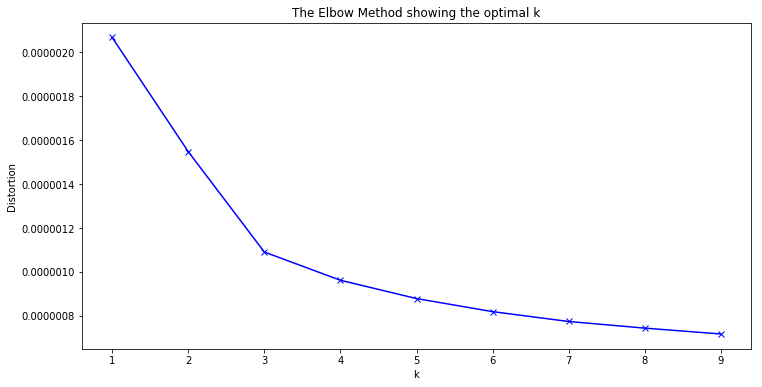

In [36]:
# plot the distortions vs K-value.
# from the graph, we see the elbow point is at k=3
plt.figure(figsize=(12,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

In [37]:
# fit a k means models with k=3 and output the centriods for the 3 clusters
kmeanModel = KMeans(n_clusters=3).fit(normalized_cluster_df)
centroids = kmeanModel.cluster_centers_
print(centroids)

[[  8.30977213e-06   1.68385345e-05   4.54482340e-05   4.33881703e-05
    5.55021976e-06   9.54943189e-06   2.40316502e-05   1.25121530e-05
    7.37811087e-05   2.94166818e-06   0.00000000e+00   9.99999994e-01]
 [  1.13659139e-05   2.45060437e-05   2.20704329e-05   1.87844052e-05
    2.29407735e-05   2.56669302e-05   2.60254074e-05   1.24813843e-05
    2.73065669e-05   3.32306130e-05   0.00000000e+00   9.99999997e-01]
 [  1.10124308e-05   2.32996233e-05   2.04665528e-05   1.58499934e-05
    9.66010155e-06   1.15710990e-05   2.05144086e-05   1.32663690e-05
    7.01389254e-05   1.95801355e-06   0.00000000e+00   9.99999996e-01]]


In [38]:
# output the K-means model labels as we see, 0,1,and 2.
import numpy as np
print(np.unique(kmeanModel.labels_,return_counts=True))

(array([0, 1, 2]), array([ 417,  170, 1207], dtype=int64))


In [39]:
# output the label of each data point
socio_economic_grouped['Socio_economic_cluster']=kmeanModel.labels_
print(socio_economic_grouped.Socio_economic_cluster.value_counts())
socio_economic_grouped.head(10)

2    1207
0     417
1     170
Name: Socio_economic_cluster, dtype: int64


,Zip_code,Disability_Ratio,25Kto50K_earnings_Ratio,Above_50K_earnings_Ratio,Higher_Education_Ratio,HH_Foodstamps_Ratio,HH_Married_Couple_Ratio,HH_Living_Alone_Ratio,Total_Widowed_Divorced_Ratio,White_Pop_Ratio,African_American_Pop_Ratio,Work_Transport_Public_Ratio,ZIP,STATECODE,Socio_economic_cluster
1819,06390,0.030,0.297,0.434,0.478,nan,0.136,0.237,0.141,0.980,0.000,0.000,06390,NY,0
2558,10001,0.076,0.149,0.620,0.627,0.076,0.072,0.551,0.104,0.635,0.096,0.000,10001,NY,0
2559,10002,0.160,0.232,0.365,0.333,0.310,0.216,0.428,0.166,0.315,0.085,0.000,10002,NY,1
2560,10003,0.059,0.153,0.621,0.653,0.030,0.045,0.562,0.088,0.775,0.044,0.000,10003,NY,0
2561,10004,0.026,0.092,0.811,0.854,nan,0.054,0.544,0.082,0.723,0.010,0.000,10004,NY,0
2562,10005,0.015,0.108,0.722,0.841,nan,0.034,0.406,0.062,0.738,0.028,0.000,10005,NY,0
2563,10006,0.000,0.069,0.822,0.898,nan,0.042,0.527,0.064,0.660,0.030,0.000,10006,NY,0
2564,10007,0.029,0.069,0.787,0.741,0.030,0.037,0.386,0.080,0.711,0.058,0.000,10007,NY,0
2565,10009,0.116,0.210,0.530,0.573,0.161,0.161,0.497,0.136,0.606,0.082,0.000,10009,NY,0
2566,10010,0.072,0.127,0.690,0.712,0.043,0.062,0.536,0.092,0.741,0.057,0.000,10010,NY,0


In [40]:
# add Count of VA facilities at the zip code level
Counts_VA_at_zipCode=pd.read_csv('Counts_VA_at_zipCode.csv', **kwargs)
print(Counts_VA_at_zipCode.shape)
socio_economic_grouped=socio_economic_grouped.merge(Counts_VA_at_zipCode,how='left', left_on='Zip_code', right_on='zip')
socio_economic_grouped.drop(['zip'], axis=1, inplace=True)
socio_economic_grouped.rename(columns={'StationID':'Counts_of_VA'},inplace=True)
socio_economic_grouped['Counts_of_VA']=socio_economic_grouped['Counts_of_VA'].fillna(0)
socio_economic_grouped.head()

(1628, 2)


,Zip_code,Disability_Ratio,25Kto50K_earnings_Ratio,Above_50K_earnings_Ratio,Higher_Education_Ratio,HH_Foodstamps_Ratio,HH_Married_Couple_Ratio,HH_Living_Alone_Ratio,Total_Widowed_Divorced_Ratio,White_Pop_Ratio,African_American_Pop_Ratio,Work_Transport_Public_Ratio,ZIP,STATECODE,Socio_economic_cluster,Counts_of_VA
0,06390,0.030,0.297,0.434,0.478,nan,0.136,0.237,0.141,0.980,0.000,0.000,06390,NY,0,0.000
1,10001,0.076,0.149,0.620,0.627,0.076,0.072,0.551,0.104,0.635,0.096,0.000,10001,NY,0,0.000
2,10002,0.160,0.232,0.365,0.333,0.310,0.216,0.428,0.166,0.315,0.085,0.000,10002,NY,1,0.000
3,10003,0.059,0.153,0.621,0.653,0.030,0.045,0.562,0.088,0.775,0.044,0.000,10003,NY,0,0.000
4,10004,0.026,0.092,0.811,0.854,nan,0.054,0.544,0.082,0.723,0.010,0.000,10004,NY,0,0.000


In [41]:
# calculate the counts of VA at cluster level
socio_economic_grouped.groupby('Socio_economic_cluster').sum()['Counts_of_VA']

Socio_economic_cluster
0   21.000
1   14.000
2   50.000
Name: Counts_of_VA, dtype: float64

In [42]:
# output socio_economic cluster for profiling 
socio_economic_state=socio_economic_df_2016[socio_economic_df_2016.zcta.isin(socio_economic_grouped['Zip_code'])]
socio_economic_state_all=socio_economic_state.merge(socio_economic_grouped[['Zip_code','Socio_economic_cluster']], how='left', right_on='Zip_code',left_on='zcta')
socio_economic_state_all

,state,zcta,tot_disability,tot_population,tot_popul_abv16,earning_25to50k,earning_50to100k,earning_above100k,edu_attain_tot_popul,bachlr_deg_abv18,gradprof_deg_abv18,hh_foodstamps,hh_foodstamps_to_tot_hh,with_hlth_ins_cov,tot_hic_popul,tot_hh,hh_marriedcouple,hh_livingalone,tot_50to100k,tot_100to200k,tot_above200k,tot_household_income_popul,tot_widowed,tot_divorced,tot_marital_statu_popul,white_popul,tot_population_by_race_popul,africanamerican_popul,tot_mode_of_trans_popul,wrktrnsprt_pubtrnsprt,published_year,Zip_code,Socio_economic_cluster
0,NaN,10024,4849,58084,36570,6041,9731,14466,49056,16904,20970,1347,4.680,54947.000,58084.000,28809.000,1992.000,13498.000,5758.000,6951.000,9086.000,28809.000,1905.000,4785.000,50548.000,47632.000,58516.000,3146.000,1210128.000,0.000,2016,10024,0
1,NaN,10029,10203,78518,36365,9008,8240,3121,63044,12560,7636,10135,33.080,69947.000,78518.000,30640.000,9905.000,11786.000,6640.000,2974.000,1484.000,30640.000,3973.000,5479.000,66338.000,27547.000,79411.000,22983.000,1268487.000,0.000,2016,10029,1
2,NaN,10038,2519,22285,13458,2069,4047,3758,19873,6793,4309,1804,17.950,21113.000,22285.000,10048.000,1188.000,4205.000,1813.000,2540.000,1806.000,10048.000,1397.000,1559.000,20271.000,11212.000,22300.000,1940.000,372558.000,0.000,2016,10038,0
3,NaN,10075,1823,23030,14632,1984,4246,6095,20436,7831,8098,465,3.640,22317.000,23030.000,12766.000,715.000,6673.000,3117.000,3274.000,3640.000,12766.000,917.000,1935.000,20984.000,20558.000,23353.000,341.000,459609.000,0.000,2016,10075,0
4,NaN,10168,0,0,0,0,0,0,0,0,0,0,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2016,10168,2
5,NaN,10170,0,0,0,0,0,0,0,0,0,0,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2016,10170,2
6,NaN,10199,0,0,0,0,0,0,0,0,0,0,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2016,10199,2
7,NaN,10452,11967,75116,32035,9423,4277,500,53145,4975,1292,12459,48.360,64454.000,75116.000,25765.000,11218.000,7716.000,5444.000,1308.000,205.000,25765.000,2504.000,5158.000,56884.000,8364.000,75288.000,23852.000,1311650.000,0.000,2016,10452,1
8,NaN,10458,10074,81698,37786,10934,4796,806,59411,5111,1981,12003,44.460,69433.000,81698.000,27000.000,10694.000,8002.000,6064.000,1877.000,272.000,27000.000,2404.000,5804.000,63084.000,15769.000,81698.000,16735.000,1487023.000,0.000,2016,10458,1
9,NaN,10460,8318,60205,24026,6198,2618,424,43242,3900,997,10229,51.210,52757.000,60205.000,19974.000,9489.000,5251.000,3641.000,1015.000,117.000,19974.000,2428.000,3741.000,46231.000,8084.000,60266.000,17196.000,1032501.000,0.000,2016,10460,1


In [43]:
# sum up the counts of numerators and denominators
socio_economic_recalculate=socio_economic_state_all.groupby(['Socio_economic_cluster']).sum()
socio_economic_recalculate

,tot_disability,tot_population,tot_popul_abv16,earning_25to50k,earning_50to100k,earning_above100k,edu_attain_tot_popul,bachlr_deg_abv18,gradprof_deg_abv18,hh_foodstamps,hh_foodstamps_to_tot_hh,with_hlth_ins_cov,tot_hic_popul,tot_hh,hh_marriedcouple,hh_livingalone,tot_50to100k,tot_100to200k,tot_above200k,tot_household_income_popul,tot_widowed,tot_divorced,tot_marital_statu_popul,white_popul,tot_population_by_race_popul,africanamerican_popul,tot_mode_of_trans_popul,wrktrnsprt_pubtrnsprt,published_year
Socio_economic_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,532016,5820181,3303736,653806,959890,787016,4715552,1320527,1090424,145141,1780.210,5491059.000,5820181.000,2312198.000,266854.000,733335.000,582640.000,679540.000,406441.000,2312198.000,291078.000,370594.000,4921798.000,4648026.000,5873684.000,265487.000,114044636.000,0.000,840672
1,745296,6336033,3093067,910452,644864,177047,4897310,719288,391445,611299,4490.900,5544493.000,6336033.000,2179220.000,692376.000,640306.000,572040.000,331427.000,74206.000,2179220.000,284893.000,441907.000,5146563.000,1808773.000,6403897.000,2450556.000,123753516.000,0.000,342720
2,910474,7297364,3921556,1128924,925111,259460,5858078,883653,585357,361994,13568.250,6749934.000,7297364.000,2774769.000,458671.000,790473.000,888168.000,540498.000,104243.000,2774769.000,394917.000,599641.000,6138016.000,6210542.000,7419767.000,357208.000,108918897.000,0.000,2433312


In [44]:
# output ratios of socio_economic cluster for profiling 

#DISABILITY
socio_economic_recalculate['Disability_Ratio'] = \
socio_economic_recalculate.tot_disability/socio_economic_recalculate.tot_population

#INCOME
socio_economic_recalculate['25Kto50K_earnings_Ratio'] = \
socio_economic_recalculate.earning_25to50k/socio_economic_recalculate.tot_popul_abv16
socio_economic_recalculate['Above_50K_earnings_Ratio'] = \
(socio_economic_recalculate.earning_50to100k+socio_economic_recalculate.earning_above100k)/socio_economic_recalculate.tot_popul_abv16

#EDUCATION
socio_economic_recalculate['Higher_Education_Ratio'] = \
(socio_economic_recalculate.bachlr_deg_abv18+socio_economic_recalculate.gradprof_deg_abv18)/socio_economic_recalculate.edu_attain_tot_popul

#FOODSTAMPS
socio_economic_recalculate['HH_Foodstamps_Ratio'] = (socio_economic_recalculate.hh_foodstamps/\
                                      (socio_economic_recalculate.hh_foodstamps_to_tot_hh*0.01))/\
                                        socio_economic_recalculate.hh_foodstamps

#LIVING ALONE
socio_economic_recalculate['HH_Married_Couple_Ratio'] = socio_economic_recalculate.hh_marriedcouple/socio_economic_recalculate.tot_hh
socio_economic_recalculate['HH_Living_Alone_Ratio'] = socio_economic_recalculate.hh_livingalone/socio_economic_recalculate.tot_hh

#WIDOWED/DIVORCED
socio_economic_recalculate['Total_Widowed_Divorced_Ratio'] = \
(socio_economic_recalculate.tot_widowed+socio_economic_recalculate.tot_divorced)/socio_economic_recalculate.tot_marital_statu_popul

#RACE
socio_economic_recalculate['White_Pop_Ratio'] = \
socio_economic_recalculate.white_popul/socio_economic_recalculate.tot_population_by_race_popul
socio_economic_recalculate['African_American_Pop_Ratio'] = \
socio_economic_recalculate.africanamerican_popul/socio_economic_recalculate.tot_population_by_race_popul

#TRANSPORTATION
socio_economic_recalculate['Work_Transport_Public_Ratio'] = \
socio_economic_recalculate.wrktrnsprt_pubtrnsprt/socio_economic_recalculate.tot_mode_of_trans_popul
socio_economic_recalculate=socio_economic_recalculate[['Disability_Ratio','25Kto50K_earnings_Ratio','Above_50K_earnings_Ratio','Higher_Education_Ratio',
                'HH_Foodstamps_Ratio','HH_Married_Couple_Ratio','HH_Living_Alone_Ratio',
                'Total_Widowed_Divorced_Ratio','White_Pop_Ratio','African_American_Pop_Ratio','Work_Transport_Public_Ratio']]
socio_economic_recalculate

,Disability_Ratio,25Kto50K_earnings_Ratio,Above_50K_earnings_Ratio,Higher_Education_Ratio,HH_Foodstamps_Ratio,HH_Married_Couple_Ratio,HH_Living_Alone_Ratio,Total_Widowed_Divorced_Ratio,White_Pop_Ratio,African_American_Pop_Ratio,Work_Transport_Public_Ratio
Socio_economic_cluster,,,,,,,,,,,
0,0.091,0.198,0.529,0.511,0.056,0.115,0.317,0.134,0.791,0.045,0.000
1,0.118,0.294,0.266,0.227,0.022,0.318,0.294,0.141,0.282,0.383,0.000
2,0.125,0.288,0.302,0.251,0.007,0.165,0.285,0.162,0.837,0.048,0.000


In [45]:
# output socio_economic cluster for profiling 
socio_economic_recalculate_all=socio_economic_state_all.sum()

#DISABILITY
socio_economic_recalculate_all['Disability_Ratio'] = \
socio_economic_recalculate_all.tot_disability/socio_economic_recalculate_all.tot_population

#INCOME
socio_economic_recalculate_all['25Kto50K_earnings_Ratio'] = \
socio_economic_recalculate_all.earning_25to50k/socio_economic_recalculate_all.tot_popul_abv16
socio_economic_recalculate_all['Above_50K_earnings_Ratio'] = \
(socio_economic_recalculate_all.earning_50to100k+socio_economic_recalculate_all.earning_above100k)/socio_economic_recalculate_all.tot_popul_abv16

#EDUCATION
socio_economic_recalculate_all['Higher_Education_Ratio'] = \
(socio_economic_recalculate_all.bachlr_deg_abv18+socio_economic_recalculate_all.gradprof_deg_abv18)/socio_economic_recalculate_all.edu_attain_tot_popul

#FOODSTAMPS
socio_economic_recalculate_all['HH_Foodstamps_Ratio'] = (socio_economic_recalculate_all.hh_foodstamps/\
                                      (socio_economic_recalculate_all.hh_foodstamps_to_tot_hh*0.01))/\
                                        socio_economic_recalculate_all.hh_foodstamps
#LIVING ALONE
socio_economic_recalculate_all['HH_Married_Couple_Ratio'] = socio_economic_recalculate_all.hh_marriedcouple/socio_economic_recalculate_all.tot_hh
socio_economic_recalculate_all['HH_Living_Alone_Ratio'] = socio_economic_recalculate_all.hh_livingalone/socio_economic_recalculate_all.tot_hh

#WIDOWED/DIVORCED
socio_economic_recalculate_all['Total_Widowed_Divorced_Ratio'] = \
(socio_economic_recalculate_all.tot_widowed+socio_economic_recalculate_all.tot_divorced)/socio_economic_recalculate_all.tot_marital_statu_popul

#RACE
socio_economic_recalculate_all['White_Pop_Ratio'] = \
socio_economic_recalculate_all.white_popul/socio_economic_recalculate_all.tot_population_by_race_popul
socio_economic_recalculate_all['African_American_Pop_Ratio'] = \
socio_economic_recalculate_all.africanamerican_popul/socio_economic_recalculate_all.tot_population_by_race_popul

#TRANSPORTATION
socio_economic_recalculate_all['Work_Transport_Public_Ratio'] = \
socio_economic_recalculate_all.wrktrnsprt_pubtrnsprt/socio_economic_recalculate_all.tot_mode_of_trans_popul
socio_economic_recalculate_all=socio_economic_recalculate_all[['Disability_Ratio','25Kto50K_earnings_Ratio','Above_50K_earnings_Ratio','Higher_Education_Ratio',
                'HH_Foodstamps_Ratio','HH_Married_Couple_Ratio','HH_Living_Alone_Ratio',
                'Total_Widowed_Divorced_Ratio','White_Pop_Ratio','African_American_Pop_Ratio','Work_Transport_Public_Ratio']]
socio_economic_recalculate_all

Disability_Ratio               0.112
25Kto50K_earnings_Ratio        0.261
Above_50K_earnings_Ratio       0.364
Higher_Education_Ratio         0.323
HH_Foodstamps_Ratio            0.005
HH_Married_Couple_Ratio        0.195
HH_Living_Alone_Ratio          0.298
Total_Widowed_Divorced_Ratio   0.147
White_Pop_Ratio                0.643
African_American_Pop_Ratio     0.156
Work_Transport_Public_Ratio    0.000
dtype: float64

<font color='green'>**-----------------------------------------------------Part 4: Output the 2x2 Profile Table. ---------------------------------------------------**</font>

In [46]:
# create the dataset for the 2x2 table for the two clusters 
cluster_2_by_2=pd.merge(Active_members_top_22_veterans_65_plus, socio_economic_grouped, how='left', left_on='Zip', right_on='Zip_code')
cluster_2_by_2.sort_values(['MEDICARE_NUMBER'],inplace=True)
cluster_2_by_2.drop_duplicates(subset=['MEDICARE_NUMBER'],keep='first',inplace=True)
print(cluster_2_by_2.shape)
print(cluster_2_by_2.MEDICARE_NUMBER.nunique())
cluster_2_by_2.head()

(28744, 138)
28744


,MEDICARE_NUMBER,Member_ID,Eff_Date,Term_Date,Mbr_Mths,Contract_Number,PBP,Product,CMS_County,CMS_State,NEW_REGION,MA_Territory,DOB,Age,Gender,Zip,FIPS,Plan_Type,dual_Status,PCP_Name_x,PCP_Tax_ID,GroupName,GroupNumber,GroupSegment,GroupSegmentName,TRR_Parent_Name,TOH_Name,Recruiter_Name,Writing_Agent_Name,Sales_Channel,New_Market,SNP,LIS_Flag,Enroll_Status,Issued_Status,Group_Status,EMERG_TRANSACTIONS,PCP_TRANSACTIONS,SPCLST_TRANSACTIONS,IP_TRANSACTIONS,EMERG_VISITS,PRIMARY_CARE_VISITS,SPCLST_VISITS,IP_VISITS,PREVENTIVE_CARE_VISITS,EMERG_BENEFIT_PAID_AMT,PCP_BENEFIT_PAID_AMT,SPCLST_BENEFIT_PAID_AMT,IP_BENEFIT_PAID_AMT,EMERG_MBR_PAID_AMT,...,Statin use in Diabetes - Noncompliant,Ind_PTSD_Related_Disorders,Ind_Addictive_diagnosis,High_Need_Group,Ind_Mental_Disorder,HOSPICE_IND,DISABILITY_IND,ESRD_IND,OUT_OF_AREA_FLAG,Distance_From_VA,RX_MBR_PAID_AMOUNT,RX_CLAIM_COUNT,DISTINCT_GPI,GRV_COUNTS,Call_counts,Decile,Propensity,Adult BMI - Compliant,Breast Cancer Screening - Compliant,Colorectal Cancer - Compliant,Diabetes - Blood Sugar Controlled - Compliant,Diabetes - Eye - Compliant,Diabetes - Kidney - Compliant,Osteo Screening - Compliant,Rheumatoid Arthritis - Compliant,Statin Therapy for Patients with CD - Compliant,Medication Reconciliation Post Discharge,Medication Therapy Management,ACEI/ARB Adherence - Compliant,Diabetes Adherence - Compliant,Statin Adherence - Compliant,Statin use in Diabetes - Compliant,Counts_noncompliant,Veteran_cluster,Zip_code,Disability_Ratio,25Kto50K_earnings_Ratio,Above_50K_earnings_Ratio,Higher_Education_Ratio,HH_Foodstamps_Ratio,HH_Married_Couple_Ratio,HH_Living_Alone_Ratio,Total_Widowed_Divorced_Ratio,White_Pop_Ratio,African_American_Pop_Ratio,Work_Transport_Public_Ratio,ZIP,STATECODE,Socio_economic_cluster,Counts_of_VA
7039,1A00TK0AF03,MEBR259Q,2019-01-01,9999-12-31,20,H5521,040,MA,KINGS,NY,NORTHEAST,NY_METRO_NEW_YORK,1945-02-23,75.000,F,11224,36047,PPO,02,"Quentin Medical, P.C. ...",861067488,NE IND PPO,467244,40,None,None,"Aon Hewitt Health Market Insurance Solutions, ...","Aon Hewitt Health Market Insurance Solutions, ...","SWARCZEWSKI, ROBERT",EmpGroupExchange,NYNJ,None,3,Active,Issued,Individual,0.000,16.000,24.000,0.000,0.000,16.000,19.000,0.000,0.000,0.000,1446.040,4161.750,0.000,0.000,...,-1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,3.800,0.000,7.000,4.000,0.000,12.000,1,0.959,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,1.000,0,11224,0.233,0.274,0.292,0.315,0.427,0.279,0.361,0.216,0.591,0.221,0.000,11224,NY,1.000,0.000
6889,1A01K03KE01,MEBRS55P,2019-01-01,9999-12-31,20,H5521,077,MA,ONONDAGA,NY,NORTHEAST,NY_NORTHERN_CENTRAL_UPSTATE_NEW_YORK,1949-05-24,71.000,M,13035,36067,PPO,None,University Surgical Associates LLP ...,166074527,NE IND PPO,354635,40,None,None,K F Agency Inc.,K F Agency Inc.,"Ruggiero, Louis",NDP,NYNJ,None,None,Active,Issued,Individual,0.000,4.000,0.000,0.000,0.000,3.000,0.000,0.000,1.000,0.000,346.850,0.000,0.000,0.000,...,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,16.200,7.800,1.000,1.000,0.000,0.000,1,0.959,1.000,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0,13035,0.104,0.211,0.340,0.380,0.055,0.116,0.272,0.149,0.963,0.022,0.000,13035,NY,2.000,0.000
12601,1A03K54QH15,MEBST60V,2019-07-01,9999-12-31,14,H5521,077,MA,TIOGA,NY,NORTHEAST,NY_NORTHERN_CENTRAL_UPSTATE_NEW_YORK,1932-01-28,88.000,F,14883,36107,PPO,None,"Internal Medicine of Ithaca, PC ...",260507057,NE IND PPO,354635,40,None,None,Jack Schroeder & Associates Inc.,Jack Schroeder & Associates Inc.,"Sheely, Charles",NDP,NYNJ,None,None,Active,Issued,Individual,0.000,2.000,3.000,0.000,0.000,3.000,3.000,0.000,0.000,0.000,307.590,130.660,0.000,0.000,...,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,18.500,50.000,4.000,2.000,0.000,0.000,1,0.935,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,0.000,0,14883,0.198,0.367,0.240,0.207,0.263,0.158,0.294,0.183,0.935,0.014,0.000,14883,NY,2.000,0.000
24870,1A05CK5KY50,MEBS21HL,2019-09-01,9999-12-31,12,H

In [47]:
# output the counts of the 2x2 cluster counts
pd.crosstab(cluster_2_by_2.Socio_economic_cluster,cluster_2_by_2.Veteran_cluster,margins=True)

Veteran_cluster,0,1,2,All
Socio_economic_cluster,,,,
0.0,7299,2254,1430,10983
1.0,3044,1080,577,4701
2.0,8486,2522,1603,12611
All,18829,5856,3610,28295


In [53]:
# calculate the number of zip codes in the target group - which is the low ulitizer and low income
print(cluster_2_by_2[(cluster_2_by_2.Socio_economic_cluster==1) & (cluster_2_by_2.Veteran_cluster==1)].Zip.nunique())
cluster_2_by_2[(cluster_2_by_2.Veteran_cluster==1) & (cluster_2_by_2.Socio_economic_cluster==1)]

143


,MEDICARE_NUMBER,Member_ID,Eff_Date,Term_Date,Mbr_Mths,Contract_Number,PBP,Product,CMS_County,CMS_State,NEW_REGION,MA_Territory,DOB,Age,Gender,Zip,FIPS,Plan_Type,dual_Status,PCP_Name_x,PCP_Tax_ID,GroupName,GroupNumber,GroupSegment,GroupSegmentName,TRR_Parent_Name,TOH_Name,Recruiter_Name,Writing_Agent_Name,Sales_Channel,New_Market,SNP,LIS_Flag,Enroll_Status,Issued_Status,Group_Status,EMERG_TRANSACTIONS,PCP_TRANSACTIONS,SPCLST_TRANSACTIONS,IP_TRANSACTIONS,EMERG_VISITS,PRIMARY_CARE_VISITS,SPCLST_VISITS,IP_VISITS,PREVENTIVE_CARE_VISITS,EMERG_BENEFIT_PAID_AMT,PCP_BENEFIT_PAID_AMT,SPCLST_BENEFIT_PAID_AMT,IP_BENEFIT_PAID_AMT,EMERG_MBR_PAID_AMT,...,Statin use in Diabetes - Noncompliant,Ind_PTSD_Related_Disorders,Ind_Addictive_diagnosis,High_Need_Group,Ind_Mental_Disorder,HOSPICE_IND,DISABILITY_IND,ESRD_IND,OUT_OF_AREA_FLAG,Distance_From_VA,RX_MBR_PAID_AMOUNT,RX_CLAIM_COUNT,DISTINCT_GPI,GRV_COUNTS,Call_counts,Decile,Propensity,Adult BMI - Compliant,Breast Cancer Screening - Compliant,Colorectal Cancer - Compliant,Diabetes - Blood Sugar Controlled - Compliant,Diabetes - Eye - Compliant,Diabetes - Kidney - Compliant,Osteo Screening - Compliant,Rheumatoid Arthritis - Compliant,Statin Therapy for Patients with CD - Compliant,Medication Reconciliation Post Discharge,Medication Therapy Management,ACEI/ARB Adherence - Compliant,Diabetes Adherence - Compliant,Statin Adherence - Compliant,Statin use in Diabetes - Compliant,Counts_noncompliant,Veteran_cluster,Zip_code,Disability_Ratio,25Kto50K_earnings_Ratio,Above_50K_earnings_Ratio,Higher_Education_Ratio,HH_Foodstamps_Ratio,HH_Married_Couple_Ratio,HH_Living_Alone_Ratio,Total_Widowed_Divorced_Ratio,White_Pop_Ratio,African_American_Pop_Ratio,Work_Transport_Public_Ratio,ZIP,STATECODE,Socio_economic_cluster,Counts_of_VA
3553,1AE2U55MP13,MEBSWWPC,2019-07-01,9999-12-31,14,H3312,048,MA,ONONDAGA,NY,NORTHEAST,NY_NORTHERN_CENTRAL_UPSTATE_NEW_YORK,1940-12-15,80.000,F,13208,36067,HMO,03,Family Care Medical Group ...,221320860,NE INDIVIDUAL HMO,354055,40,None,None,New York Market,New York Market,"Garritillo, Gerald",Direct,NYNJ,None,1,Active,Issued,Individual,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.100,0.000,0.000,0.000,0.000,0.000,1,0.973,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,1,13208,0.158,0.319,0.203,0.172,0.349,0.271,0.353,0.179,0.554,0.177,0.000,13208,NY,1.000,0.000
28195,1AF8RW5XX21,MEBTSLCW,2020-01-01,9999-12-31,8,H5521,120,MA,WESTCHESTER,NY,NORTHEAST,NY_ROCKLAND_WESTCHESTER,1942-02-14,78.000,F,10552,36119,PPO,None,Montefiore Medical Group ...,254471170,NE IND PPO,354635,40,None,None,"Amerilife Agencies,","GOODWIN, DANIEL","Spira, Marc",NDP,NYNJ,None,None,Active,Issued,Individual,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.900,0.000,0.000,0.000,0.000,15.000,3,0.821,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,1,10552,0.106,0.274,0.412,0.396,0.105,0.197,0.397,0.194,0.485,0.405,0.000,10552,NY,1.000,0.000
466,1AT2WD0KM01,MEBH0WYH,2014-01-01,9999-12-31,80,H5521,040,MA,QUEENS,NY,NORTHEAST,NY_METRO_NEW_YORK,1946-12-24,74.000,M,11413,36081,PPO,None,"Johnson, Golda O ...",133469500,NE IND PPO,467244,40,None,None,"EHealthInsurance Services, Inc.",None,"Hurley, Robert",NDP,NYNJ,None,None,Active,Issued,Individual,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.100,0.000,0.000,0.000,0.000,2.000,1,0.992,1.000,nan,1.000,1.000,1.000,1.000,nan,nan,1.000,nan,nan,1.000,0.000,1.000,1.000,3.000,1,11413,0.097,0.300,0.365,0.243,0.141,0.388,0.165,0.160,0.024,0.912,0.000,11413,NY,1.000,0.000
13533,1AW0RR8DA26,MEBTWYTR,2020-04-01,9999-12-31,5,H5521,120,MA,BRONX,NY,NORTHEAST,NY_METRO_NEW_YORK,1949-12-17,71.000,M,10470,36005,PPO,None,South Yonkers Family Practice ...,412129630,NE IN

In [49]:
# output the distribution table for the targeted predicted vaterans - 5,966 low utilizers
print(Active_members_top_22_veterans_65_plus[Active_members_top_22_veterans_65_plus.Veteran_cluster==1].Contract_Number.value_counts())
Active_members_top_22_veterans_65_plus[Active_members_top_22_veterans_65_plus.Veteran_cluster==1].Contract_Number.value_counts(normalize=True)

H5521    4223
H3312    1742
H5793       1
Name: Contract_Number, dtype: int64


H5521   0.708
H3312   0.292
H5793   0.000
Name: Contract_Number, dtype: float64

In [56]:
# output the distribution table for the targeted predicted vaterans AND low incomer - 1,080 low utilizers
print(cluster_2_by_2[(cluster_2_by_2.Veteran_cluster==1) & (cluster_2_by_2.Socio_economic_cluster==1)].Contract_Number.value_counts())
cluster_2_by_2[(cluster_2_by_2.Veteran_cluster==1) & (cluster_2_by_2.Socio_economic_cluster==1)].Contract_Number.value_counts(normalize=True)

H5521    682
H3312    398
Name: Contract_Number, dtype: int64


H5521   0.631
H3312   0.369
Name: Contract_Number, dtype: float64

<font color='green'>**-----------------------------------------------------Part 5: Prioritization. ---------------------------------------------------**</font>

In [54]:
# select the targeted predicted vaterans AND low incomer
target_group=cluster_2_by_2[(cluster_2_by_2.Veteran_cluster==1) & (cluster_2_by_2.Socio_economic_cluster==1)]
print(target_group.MEDICARE_NUMBER.nunique())
print(target_group.info(verbose=True))
target_group.head()

1080
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 3553 to 3211
Data columns (total 138 columns):
MEDICARE_NUMBER                                            object
Member_ID                                                  object
Eff_Date                                                   object
Term_Date                                                  object
Mbr_Mths                                                   int64
Contract_Number                                            object
PBP                                                        object
Product                                                    object
CMS_County                                                 object
CMS_State                                                  object
NEW_REGION                                                 object
MA_Territory                                               object
DOB                                                        object
Age                        

,MEDICARE_NUMBER,Member_ID,Eff_Date,Term_Date,Mbr_Mths,Contract_Number,PBP,Product,CMS_County,CMS_State,NEW_REGION,MA_Territory,DOB,Age,Gender,Zip,FIPS,Plan_Type,dual_Status,PCP_Name_x,PCP_Tax_ID,GroupName,GroupNumber,GroupSegment,GroupSegmentName,TRR_Parent_Name,TOH_Name,Recruiter_Name,Writing_Agent_Name,Sales_Channel,New_Market,SNP,LIS_Flag,Enroll_Status,Issued_Status,Group_Status,EMERG_TRANSACTIONS,PCP_TRANSACTIONS,SPCLST_TRANSACTIONS,IP_TRANSACTIONS,EMERG_VISITS,PRIMARY_CARE_VISITS,SPCLST_VISITS,IP_VISITS,PREVENTIVE_CARE_VISITS,EMERG_BENEFIT_PAID_AMT,PCP_BENEFIT_PAID_AMT,SPCLST_BENEFIT_PAID_AMT,IP_BENEFIT_PAID_AMT,EMERG_MBR_PAID_AMT,...,Statin use in Diabetes - Noncompliant,Ind_PTSD_Related_Disorders,Ind_Addictive_diagnosis,High_Need_Group,Ind_Mental_Disorder,HOSPICE_IND,DISABILITY_IND,ESRD_IND,OUT_OF_AREA_FLAG,Distance_From_VA,RX_MBR_PAID_AMOUNT,RX_CLAIM_COUNT,DISTINCT_GPI,GRV_COUNTS,Call_counts,Decile,Propensity,Adult BMI - Compliant,Breast Cancer Screening - Compliant,Colorectal Cancer - Compliant,Diabetes - Blood Sugar Controlled - Compliant,Diabetes - Eye - Compliant,Diabetes - Kidney - Compliant,Osteo Screening - Compliant,Rheumatoid Arthritis - Compliant,Statin Therapy for Patients with CD - Compliant,Medication Reconciliation Post Discharge,Medication Therapy Management,ACEI/ARB Adherence - Compliant,Diabetes Adherence - Compliant,Statin Adherence - Compliant,Statin use in Diabetes - Compliant,Counts_noncompliant,Veteran_cluster,Zip_code,Disability_Ratio,25Kto50K_earnings_Ratio,Above_50K_earnings_Ratio,Higher_Education_Ratio,HH_Foodstamps_Ratio,HH_Married_Couple_Ratio,HH_Living_Alone_Ratio,Total_Widowed_Divorced_Ratio,White_Pop_Ratio,African_American_Pop_Ratio,Work_Transport_Public_Ratio,ZIP,STATECODE,Socio_economic_cluster,Counts_of_VA
3553,1AE2U55MP13,MEBSWWPC,2019-07-01,9999-12-31,14,H3312,048,MA,ONONDAGA,NY,NORTHEAST,NY_NORTHERN_CENTRAL_UPSTATE_NEW_YORK,1940-12-15,80.000,F,13208,36067,HMO,03,Family Care Medical Group ...,221320860,NE INDIVIDUAL HMO,354055,40,None,None,New York Market,New York Market,"Garritillo, Gerald",Direct,NYNJ,None,1,Active,Issued,Individual,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.100,0.000,0.000,0.000,0.000,0.000,1,0.973,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,1,13208,0.158,0.319,0.203,0.172,0.349,0.271,0.353,0.179,0.554,0.177,0.000,13208,NY,1.000,0.000
28195,1AF8RW5XX21,MEBTSLCW,2020-01-01,9999-12-31,8,H5521,120,MA,WESTCHESTER,NY,NORTHEAST,NY_ROCKLAND_WESTCHESTER,1942-02-14,78.000,F,10552,36119,PPO,None,Montefiore Medical Group ...,254471170,NE IND PPO,354635,40,None,None,"Amerilife Agencies,","GOODWIN, DANIEL","Spira, Marc",NDP,NYNJ,None,None,Active,Issued,Individual,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.900,0.000,0.000,0.000,0.000,15.000,3,0.821,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,1,10552,0.106,0.274,0.412,0.396,0.105,0.197,0.397,0.194,0.485,0.405,0.000,10552,NY,1.000,0.000
466,1AT2WD0KM01,MEBH0WYH,2014-01-01,9999-12-31,80,H5521,040,MA,QUEENS,NY,NORTHEAST,NY_METRO_NEW_YORK,1946-12-24,74.000,M,11413,36081,PPO,None,"Johnson, Golda O ...",133469500,NE IND PPO,467244,40,None,None,"EHealthInsurance Services, Inc.",None,"Hurley, Robert",NDP,NYNJ,None,None,Active,Issued,Individual,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.100,0.000,0.000,0.000,0.000,2.000,1,0.992,1.000,nan,1.000,1.000,1.000,1.000,nan,nan,1.000,nan,nan,1.000,0.000,1.000,1.000,3.000,1,11413,0.097,0.300,0.365,0.243,0.141,0.388,0.165,0.160,0.024,0.912,0.000,11413,NY,1.000,0.000
13533,1AW0RR8DA26,MEBTWYTR,2020-04-01,9999-12-31,5,H5521,120,MA,BRONX,NY,NORTHEAST,NY_METRO_NEW_YORK,1949-12-17,71.000,M,10470,36005,PPO,None,South Yonkers Family Practice ...,412129630,NE IN

In [55]:
# output the member list for outreach
target_group.sort_values(by=['Propensity'],ascending=False).iloc[0:600,:].to_csv('Target_group_NY.csv', index=False)

<font color='green'>**--------------------------------------------------------------------------------End --------------------------------------------------------------------**</font>